 =============================================================
  ##               TRABAJO FINAL INTEGRADOR       
  
  ###                  ANALISIS DE DATOS
  ###                 CRIMENES DE CHICAGO
 =============================================================


**ALUMNOS:**
- Mauro Fabian Barquinero
- Martin Errazquin


**PREGUNTAS SUGERIDAS**
1. ¿Cómo varía la distribución de los crímenes a lo largo de las horas del día, los días de la
semana y los meses del año?¿Se observan anomalías y/o patrones estacionales?
2. ¿Hay diferencias significativas entre el número de crímenes en distintos distritos o
comunas?
3. ¿Están las fuerzas policiales bien distribuidas en relación a las características de cada
zona? (ej: la mayor cantidad de actividad policial/arrestos se registra en las zonas
críticas)
4. ¿Cómo variaron los crímenes en la ciudad después de algún cambio o evento social
importante? (ej: Covid-19, protestas, etc.)

---



## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy.stats import ttest_ind

sns.set_theme()

## Carga de datos

In [2]:
#  Cargar el dataset
#file_path = "C:\CEIA\Analisis_de_datos\Trabajo Final\Crimes_-_2024_20250315.csv"
file_path = "./Crimes_-_2024_20250315.csv"
df = pd.read_csv(file_path)

# Diccionario de Datos

A continuación se transcribe la descripción de las variables disponibles en este dataset de [[la fuente]](https://data.cityofchicago.org/Public-Safety/Crimes-2024/dqcy-ctma/about_data).

* **ID**: número único de identificación del registro.
* **Case Number**: número único de caso asignado por la policía de Chicago. 
* **Date**: Fecha en que ocurrió el incidente, aunque puede a veces ser una estimación.
* **Block(\*)**: Dirección donde ocurrió el incidente.
* **IUCR**: *Illinois Uniform Crime Reporting code*, código alfanumérico de caracterización del tipo de crimen.
* **Primary Type**: descripción primaria del IUCR.
* **Description**: descripción secundaria del IUCR, es una subcategoría del tipo primario.
* **Location Description**: descripción del lugar donde ocurrió el hecho.
* **Arrest**: variable binaria indicando si se produjo o no arresto.
* **Domestic**: variable binaria indicando si el incidente es de tipo doméstico de acuerdo al *Illinois Domestic Violence Act*.
* **Beat**: *beat* en el que ocurrió el incidente. Un *beat* es la mínima unidad geográfica territorial utilizada y tiene asignado un auto policial. 3 a 5 *beats* forman un *sector* y 3 *sectores* forman un *distrito*. La policía de Chicago abarca 22 *sectores*.
* **District**: *Distrito* en el cual ocurrió el incidente.
* **Ward**: *Distrito civil* en el cual ocurrió el incidente. Observar que estos son determinados por la ciudad de Chicago en vez de por la policía.
* **Community Area**: *Área comunal* en que ocurrió el incidente. Chicago tiene 77 de ellas.
* **FBI Code**: clasificación del crimen de acuerdo a estándares del sistema de reportes NIBRS del FBI.
* **X Coordinate(\*), Y Coordinate(\*)**: Coordenadas X e Y geográficas de acuerdo a la proyección State Plane Illinois East NAD 1983 donde ocurrió el incidente.
* **Year**: Año en que ocurrió el incidente.
* **Updated On**: Fecha de última actualización del registro.
* **Latitude(\*), Longitude(\*)**: Coordenadas geográficas de latitud y longitud donde ocurrió el incidente.
* **Location(\*)**: Ubicación de coordenada geográfica en formato POINT.

(\*): Parcialmente alteradas, de manera que el valor no es exacto, pero se garantiza que caen sobre la misma manzana que el valor real.

# Análisis de la Estructura del Dataset

In [3]:
# Se explora la estructura del dataset
print("\n🔹 Primeras filas del dataset")
df.head()


🔹 Primeras filas del dataset


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43.0,14,1186817.0,1860189.0,2024,01/08/2025 03:42:09 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38.0,26,1179661.0,1873623.0,2024,01/08/2025 03:42:09 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70.0,04B,1145740.0,1853048.0,2024,01/08/2025 03:42:09 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42.0,14,1184362.0,1861188.0,2024,01/08/2025 03:42:09 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25.0,08B,1137458.0,1907694.0,2024,01/08/2025 03:42:09 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


In [4]:
print("3 primeras filas completas:")
df.head(3).T

3 primeras filas completas:


,0,1,2
ID,13709672,13707925,13708038
Case Number,JJ101940,JJ100089,JJ100035
Date,12/31/2024 11:58:00 PM,12/31/2024 11:56:00 PM,12/31/2024 11:55:00 PM
Block,014XX E 68TH ST,047XX S DR MARTIN LUTHER KING JR DR,077XX S CICERO AVE
IUCR,1310,1365,0498
Primary Type,CRIMINAL DAMAGE,CRIMINAL TRESPASS,BATTERY
Description,TO PROPERTY,TO RESIDENCE,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE..."
Location Description,APARTMENT,APARTMENT,HOTEL / MOTEL
Arrest,False,True,False
Domestic,False,True,True


In [5]:
print("\n🔹 Informacion general del dataset")
df.info()


🔹 Informacion general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257668 entries, 0 to 257667
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    257668 non-null  int64  
 1   Case Number           257668 non-null  object 
 2   Date                  257668 non-null  object 
 3   Block                 257668 non-null  object 
 4   IUCR                  257668 non-null  object 
 5   Primary Type          257668 non-null  object 
 6   Description           257668 non-null  object 
 7   Location Description  256659 non-null  object 
 8   Arrest                257668 non-null  bool   
 9   Domestic              257668 non-null  bool   
 10  Beat                  257668 non-null  int64  
 11  District              257668 non-null  int64  
 12  Ward                  257668 non-null  int64  
 13  Community Area        257666 non-null  float64
 14  FBI Code         

In [6]:
print("\n 🔹 Cantidad de filas y columnas", df.shape)


 🔹 Cantidad de filas y columnas (257668, 22)


In [7]:
print("\n🔹 Nombres de las columnas en el dataset:")
list(df.columns)


🔹 Nombres de las columnas en el dataset:


['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

# Limpieza de Datos

## Tipos de Datos

In [8]:
# repasamos los dtypes
df.dtypes.rename('dtypes').to_frame()

,dtypes
ID,int64
Case Number,object
Date,object
Block,object
IUCR,object
Primary Type,object
Description,object
Location Description,object
Arrest,bool
Domestic,bool


### Fechas

Observamos que las columnas `Date` y `Updated On` fueron leídas como string, por lo que las convertimos a formato fecha.

In [9]:
# miramos un poco el formato de Date
df['Date'].head(5)

0    12/31/2024 11:58:00 PM
1    12/31/2024 11:56:00 PM
2    12/31/2024 11:55:00 PM
3    12/31/2024 11:53:00 PM
4    12/31/2024 11:50:00 PM
Name: Date, dtype: object

In [10]:
# ahora Updated On
df['Updated On'].head(5)

0    01/08/2025 03:42:09 PM
1    01/08/2025 03:42:09 PM
2    01/08/2025 03:42:09 PM
3    01/08/2025 03:42:09 PM
4    01/08/2025 03:42:09 PM
Name: Updated On, dtype: object

In [11]:
# ambas son formato mes/dia/año hora:minuto:segundo AM/PM
for col in ('Date', 'Updated On'):
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y %I:%M:%S %p')

### Categóricas

Las columnas leídas como _object_, excluyendo las anteriores que eran fecha, son las siguientes: `Case Number`,`Block`,`IUCR`,`Primary Type`,`Description`,`Location Description`,`FBI Code`,`Location`.

Además de ello, las columnas leídas como _int_,  `Beat`, `District` y `Ward` también son categóricas, sólo que su código está indicado por un número.

Por último, `Community Area` es interpretada como _float_ a pesar de ser otra categórica. Esto puede deberse a `NaN`s que Pandas no sabe encodear en columnas de tipo _int_ .

De `ID` no nos ocupamos porque es peor encodearla como categórica que dejarla como está, ya que tiene uniqueness de 100%.

In [12]:
# mini peek de valores de ellas
df[df.columns[df.dtypes=='object']].head(3)

,Case Number,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Location
0,JJ101940,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,14,POINT (-87.59074212 41.771470188)
1,JJ100089,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,26,POINT (-87.616562762 41.808500903)
2,JJ100035,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,04B,POINT (-87.741497836 41.752748627)


Como se puede apreciar de los valores y del diccionario de datos, sólo `Location` no es categórica, las demás sí.

En particular, `Location` es un Point de GeoPandas. Por ahora no nos vamos a ocupar de ella.

In [13]:
# cambiamos todas las que no son Location a Category
cat_cols = set(df.columns[df.dtypes=='object']) | {'Beat','District','Ward', 'Community Area'} - {'Location'}
cat_cols

{'Beat',
 'Block',
 'Case Number',
 'Community Area',
 'Description',
 'District',
 'FBI Code',
 'IUCR',
 'Location',
 'Location Description',
 'Primary Type',
 'Ward'}

In [14]:
for col in cat_cols:
    df[col] = df[col].astype('category')

Repasamos los tipos de las variables ahora:

In [15]:
df.dtypes.rename('dtypes').to_frame()

,dtypes
ID,int64
Case Number,category
Date,datetime64[ns]
Block,category
IUCR,category
Primary Type,category
Description,category
Location Description,category
Arrest,bool
Domestic,bool


## Registros duplicados

¿Existen registros enteramente duplicados? De ser así, se descartan.

In [16]:
df.duplicated().sum().item()

0

No hay registros (completamente) duplicados.

## Variables a descartar

Antes de analizar a nivel de fila, formulamos hipótesis respecto de la no utilidad de algunas variables. Luego, las verificaremos y en caso positivo las variables serán descartadas. 

1) Estamos analizando crímenes del 2024, por lo que la variable `Year` debería contener solamente el valor 2024 y por tanto ser redundante.

In [17]:
# verificamos
df['Year'].value_counts()

Year
2024    257668
Name: count, dtype: int64

Efectivamente es redundante, la descartamos.

In [18]:
df.drop(columns='Year', inplace=True)

2. La variable `Location` es simplemente la latitud y longitud en formato GeoPandas-friendly, por lo que es redundante y si la necesitáramos la podemos recuperar.

In [19]:
# vemos algunas filas
df[['Latitude','Longitude','Location']].head(10)

,Latitude,Longitude,Location
0,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,41.902858,-87.770537,POINT (-87.770536741 41.902858242)
5,41.854884,-87.679008,POINT (-87.67900769 41.854883985)
6,41.681396,-87.622767,POINT (-87.622767037 41.68139574)
7,41.884152,-87.672933,POINT (-87.672932576 41.884152322)
8,41.895635,-87.699348,POINT (-87.699347915 41.895634912)
9,41.880749,-87.683951,POINT (-87.683950956 41.880749175)


Si bien la igualdad no se va a dar porque `Location` tiene algunos decimales más, del diccionario de datos sabemos que por construcción vale la hipótesis y restaba confirmarla.

Nótese que las coordenadas en formato `(X,Y)` y la variable `Block` son redundantes también con la georreferenciación, por lo que también podemos descartarlas. La variable `Block` podría haber provisto algo más de información si no estuviera ofuscada, pero lo está.

In [20]:
df.drop(columns=['Location', 'X Coordinate', 'Y Coordinate', 'Block'], inplace=True)

4. El `ID` del registro es solamente un identificador único, pero para eso ya existe el `Case Number` que cumple la misma función. Ergo, es redundante. Además, `Case Number` no aporta información realmente más que de identificación. Lo mantenemos para poder referirnos en forma individual a los casos, pero no porque analizarlo resulte valioso.

In [21]:
# verificamos
len(df)==df['ID'].nunique(), len(df)==df['Case Number'].nunique()

(True, False)

Si bien `ID` efectivamente es única, hay valores de `Case Number` con múltiples registros.

In [22]:
aux = df['Case Number'].value_counts().reset_index()

multi_row_cases = aux[aux['count'] > 1]

# cuantos hay?
multi_row_cases

,Case Number,count
0,JH332664,3
1,JH327052,3
2,JH165644,3
3,JH528033,3
4,JH100028,2
5,JH380746,2
6,JH495872,2
7,JH128963,2
8,JH539697,2
9,JH373821,2


In [23]:
multi_row_cases['count'].value_counts()

count
2    21
3     4
Name: count, dtype: int64

Tenemos entonces:

* 25 casos con múltiples registros en total
* 21 casos con 2 registros
* 4 casos con 3 registros


In [24]:
# vemos uno de los de 3
sample_multirow_case = multi_row_cases['Case Number'][0]

df[df['Case Number']==sample_multirow_case].T

,128060,128233,128267
ID,28228,28227,28226
Case Number,JH332664,JH332664,JH332664
Date,2024-07-04 13:36:00,2024-07-04 08:02:00,2024-07-04 06:53:00
IUCR,0110,0110,0110
Primary Type,HOMICIDE,HOMICIDE,HOMICIDE
Description,FIRST DEGREE MURDER,FIRST DEGREE MURDER,FIRST DEGREE MURDER
Location Description,HOUSE,HOUSE,HOUSE
Arrest,False,False,False
Domestic,False,False,False
Beat,324,324,324


In [25]:
# casi todos los valores parecen iguales, hay algunos distintos?
df[df['Case Number']==sample_multirow_case].nunique()

ID                      3
Case Number             1
Date                    3
IUCR                    1
Primary Type            1
Description             1
Location Description    1
Arrest                  1
Domestic                1
Beat                    1
District                1
Ward                    1
Community Area          1
FBI Code                1
Updated On              1
Latitude                1
Longitude               1
dtype: int64

In [26]:
# que sólo varíe la fecha vale para todos los casos con múltiples registros?
_ = df[df['Case Number']==sample_multirow_case].nunique()

_[_ > 1].index.tolist()

['ID', 'Date']

In [27]:
# ahora para todos los casos con múltiples registros
def varying_columns(sub_df):
    res = sub_df.nunique()
    return res[res > 1].index.tolist()
    
aux = (
    df[df['Case Number'].isin(set(multi_row_cases['Case Number']))]
    .drop(columns='ID')  # no nos interesa la columna ID para esto y siempre es única
    .groupby('Case Number', observed=True)
    .apply(varying_columns, include_groups=False)
)

aux

Case Number
JH100028            [Date, Updated On]
JH128963                        [Date]
JH165644                        [Date]
JH166819    [Date, Arrest, Updated On]
JH185103                            []
JH185734                            []
JH208794            [Date, Updated On]
JH232120            [Date, Updated On]
JH277783                            []
JH284448                            []
JH290818            [Date, Updated On]
JH314834                        [Date]
JH317789                            []
JH327052                        [Date]
JH332664                        [Date]
JH333940                            []
JH362433                        [Date]
JH373821                        [Date]
JH380746                        [Date]
JH459847                            []
JH495872                        [Date]
JH496538                        [Date]
JH505655                        [Date]
JH528033                        [Date]
JH539697                        [Date]
dtype: object

In [28]:
# agrupados por columnas que varían
aux.value_counts()

[Date]                        13
[]                             7
[Date, Updated On]             4
[Date, Arrest, Updated On]     1
Name: count, dtype: int64

Como se puede apreciar, en algunos no varía absolutamente ninguna variable mientras que en otros pueden variar las variables `Date`, `Arrest` y `Updated On`.

In [29]:
# hacemos foco particular en el que le cambió el Arrest
df[df['Case Number']=='JH166819'].T

,219138,220466
ID,28002,27997
Case Number,JH166819,JH166819
Date,2024-02-28 16:08:00,2024-02-26 17:55:00
IUCR,0110,0110
Primary Type,HOMICIDE,HOMICIDE
Description,FIRST DEGREE MURDER,FIRST DEGREE MURDER
Location Description,STREET,STREET
Arrest,False,True
Domestic,False,False
Beat,323,323


* Podrían ser valores correctos y tenemos que analizar cómo cambia su distribución respecto de los single-row
* Podrían ser errores de carga en cuyo caso hay que quedarnos con uno solo y tenemos que establecer un criterio para hacerlo en forma de código
    * Un criterio es simplemente borrarlos, bajo la lógica de que son 54 filas en 250k, pero es el peor criterio
    * Otro criterio podría ser quedarnos con el último que tenga Update On, aunque eso tampoco corrige todo
    * Otro criterio podría ser quedarnos con el de mayor ID, bajo la lógica de que fue el último en agregarse a la tabla

Decidimos quedarnos con aquellos de mayor `Updated On`, bajo la lógica de que la última información del caso es la de esos registros.

In [30]:
# para cada Case Number obtenemos el ID que maximiza el Updated On
res = set(
    df[df['Case Number'].isin(set(multi_row_cases['Case Number']))]
    .groupby('Case Number', observed=True)
    ['Updated On']
    .idxmax()
    .tolist()
)

res

{12011,
 18272,
 30652,
 35698,
 36073,
 56015,
 100704,
 104679,
 111227,
 127372,
 128060,
 131592,
 136685,
 138404,
 149609,
 155439,
 159330,
 184308,
 193322,
 209997,
 210331,
 219138,
 221069,
 241994,
 255450}

In [31]:
# los indices a dropear son aquellos que están en multirow y no están en res
drop_indices = set(df[df['Case Number'].isin(set(multi_row_cases['Case Number']))].index) - res
len(drop_indices)

29

In [32]:
# son 29 casos como corresponde, los dropeamos
print("len before:", len(df))
df.drop(index=drop_indices, inplace=True)
print("len after:", len(df))

len before: 257668
len after: 257639


In [33]:
# reseteamos el index
df.reset_index(drop=True, inplace=True)

In [34]:
# re-chequeamos que sean unicos
len(df), df.ID.nunique(), df['Case Number'].nunique()

(257639, 257639, 257639)

Ahora que ambos son únicos, dropeamos el `ID` dado que el `Case Number` tiene sentido en el contexto del problema, el primero no.

In [35]:
df.drop(columns='ID',inplace=True)

5. El `IUCR` es redundante dado el `Primary Type` y `Description`, por lo tanto se puede descartar la variable sin perder información.

In [36]:
# contamos cantidad de Primary Type y Description por cada valor de IUCR
(
    df
    .groupby('IUCR', observed=True)
    [['Primary Type','Description']]
    .nunique()
    .reset_index()
    .nunique()
)

IUCR            340
Primary Type      1
Description       1
dtype: int64

In [37]:
# es redundante dado solo Primary Type?
(
    df
    .groupby('Primary Type', observed=True)
    [['IUCR','Description']]
    .nunique()
    .reset_index()
)

,Primary Type,IUCR,Description
0,ARSON,5,5
1,ASSAULT,15,15
2,BATTERY,26,26
3,BURGLARY,5,5
4,CONCEALED CARRY LICENSE VIOLATION,3,3
5,CRIMINAL DAMAGE,8,8
6,CRIMINAL SEXUAL ASSAULT,13,13
7,CRIMINAL TRESPASS,5,5
8,DECEPTIVE PRACTICE,36,36
9,GAMBLING,3,3


Como se puede apreciar, efectivamente el `IUCR` es equivalente al par `(Primary Type, Description)`. Para el `Primary Type`, sin embargo, hay múltiples valores de `Description` por lo que el par es necesario. Además, sólo en tres casos de `Primary Type` (Public indicency, Non-criminal, Other narcotic violation) hay 1 sólo `Description`, en todos los demás los subcasos son múltiples.

In [38]:
# descartamos IUCR
df.drop(columns='IUCR', inplace=True)

6. El `FBI Code` es redundante algún otro subconjunto de variables que describen el tipo de crimen como las que están presentes en el dataset, por lo tanto se puede descartar.

In [39]:
# vemos si para cada tipo de FBI Code hay algún conjunto de variables que sean únicos
(
    df[['Primary Type','Description','Location Description','Domestic','FBI Code']]
    .groupby('FBI Code', observed=True)
    .nunique()
)

,Primary Type,Description,Location Description,Domestic
FBI Code,,,,
01A,1,1,33,2
01B,1,1,1,1
02,2,15,61,2
03,1,14,70,2
04A,1,12,75,2
04B,1,20,76,2
05,1,4,68,2
06,2,11,101,2
07,1,12,62,2


Como se puede apreciar, es un standard diferente que además contiene información diferente, por lo que no es redundante dado los demás. En varios casos es equivalente con el `Primary Type`, pero no siempre. Esto no quiere decir que resulte una variable relevante para el análisis, sino simplemente que no la vamos a descartar por redundante.

In [40]:
# cómo estamos hasta acá?
df.head(3).T

,0,1,2
Case Number,JJ101940,JJ100089,JJ100035
Date,2024-12-31 23:58:00,2024-12-31 23:56:00,2024-12-31 23:55:00
Primary Type,CRIMINAL DAMAGE,CRIMINAL TRESPASS,BATTERY
Description,TO PROPERTY,TO RESIDENCE,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE..."
Location Description,APARTMENT,APARTMENT,HOTEL / MOTEL
Arrest,False,True,False
Domestic,False,True,True
Beat,332,223,834
District,3,2,8
Ward,5,3,18


## Valores faltantes

In [41]:
# recordatorio de cantidad de registros
len(df)

257639

In [42]:
# veamos cuántos valores faltan por columna
df.isnull().sum()

Case Number                0
Date                       0
Primary Type               0
Description                0
Location Description    1009
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             2
FBI Code                   0
Updated On                 0
Latitude                 108
Longitude                108
dtype: int64

In [43]:
# en %
df.isnull().mean().round(4) * 100

Case Number             0.00
Date                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.39
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    0.00
Community Area          0.00
FBI Code                0.00
Updated On              0.00
Latitude                0.04
Longitude               0.04
dtype: float64

Tenemos valores faltantes en las columnas `Location Description`, `Community Area`, `Latitud` y `Longitude`. En particular, la cantidad de elementos faltantes es 1009, 2, 108 y 108 respectivamente. En todos la proporción de ausencias es <1%. Analizamos cada caso para determinar su naturaleza, e.g. si es MCAR, MAR o MNAR, si son imputables, etc.

### Latitude, Longitude

In [44]:
# los de latitud y longitud son los mismos 108 o son diferentes?
(
    df[['Latitude','Longitude']]
    .isnull()
    .value_counts()
    .reset_index()
)

,Latitude,Longitude,count
0,False,False,257531
1,True,True,108


Como es de esperar, o bien faltan ambas (porque no se ingresó la información de localización) o no falta ninguna de las dos.

Son muy pocas como para que las ausencias sean en forma sistemática, pero vemos cómo se comportan un poco.

In [45]:
# agregamos una columna de si faltan
df['missing_georref'] = df['Latitude'].isnull()

In [46]:
# agrupamos por ausencia o no de georref y vemos cuántos valores diferentes hay para cada una de las categorías
# estamos buscando valores de nunique sospechosamente bajos vs. cuando hay presencia de lat/long
_ = df.drop(columns=['Date','Latitude','Longitude'])

res = (
    _
    .groupby('missing_georref')
    .nunique()
)

res.loc['Global'] = _.drop(columns='missing_georref').nunique()

res

,Case Number,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Updated On
missing_georref,,,,,,,,,,,,
False,257531,31,318,128,2,2,275,23,50,77,26,433
True,108,15,37,21,2,2,90,21,41,50,13,50
Global,257639,31,318,128,2,2,275,23,50,77,26,463


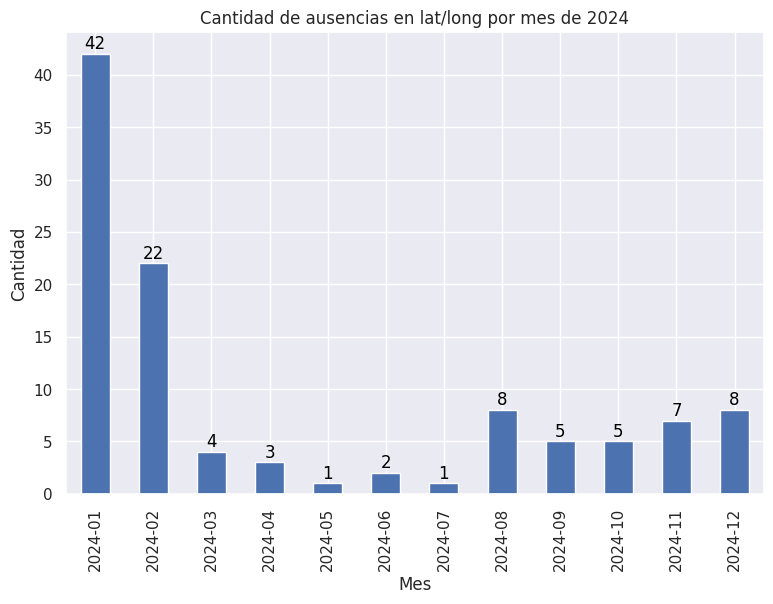

In [47]:
# solo queda mirar el Date por las dudas, miramos meses primero

fig, ax = plt.subplots(figsize=(9,6))
aux = (
    df
    .groupby(df['Date'].dt.to_period('M'))
    ['missing_georref']
    .sum()
)

ax = aux.plot(kind='bar', title='Cantidad de ausencias en lat/long por mes de 2024')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')

for x, y in zip(range(len(aux)), aux):
    ax.text(x, y + 0.1, f'{y}', color='black', ha='center', va='bottom')
    
plt.show()

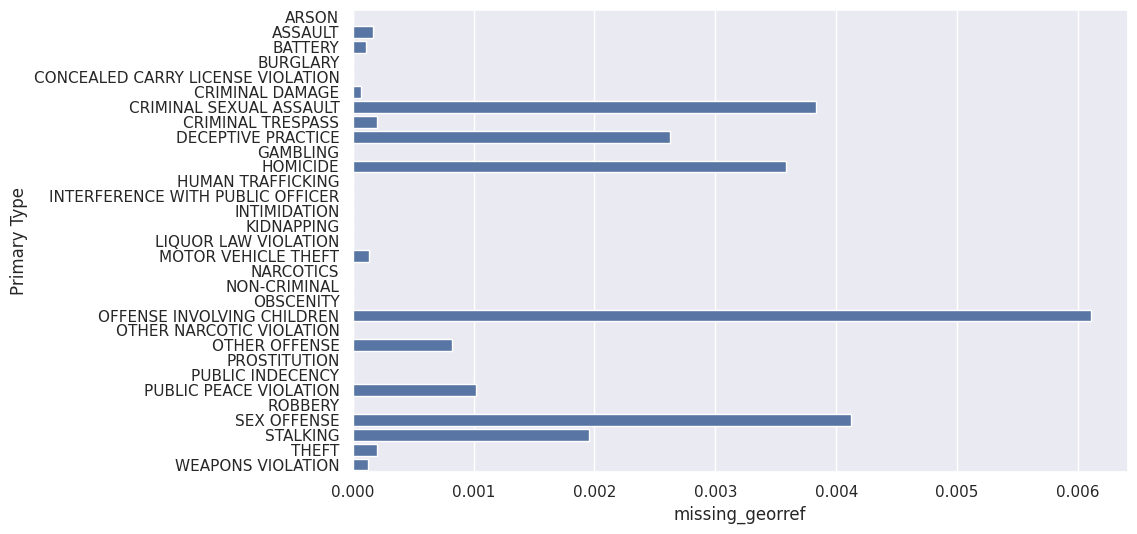

In [48]:
# de ahí sólo el primary type podría ser
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(
    data = df,
    x = 'missing_georref',
    y = 'Primary Type',
    orient = 'h',
    estimator = 'mean',
    errorbar = None
)

plt.show()

* Enero y febrero tienen una cantidad de faltantes mucho mayor a los demás meses, pero tampoco engloban a todos
* De las demás variables no hay ninguna para la que haya una diferencia sustancial entre presencia y ausencia de georref
* La única para la cual había una cantidad notoriamente menor de variabilidad fue `Primary Type` pero tampoco tiene proporciones de tipo de delito específicos

Concluimos que la ausencia puede ser de tipo MAR pero no tiene un volumen suficiente para que resulte relevante.

En caso de que sea necesario, se pueden imputar utilizando el `Beat`, que es la mínima unidad de zona geográfica.

**Por ahora no imputamos la geolocalización porque no lo hallamos necesario.**

### Community Area

In [49]:
# a ver en forma particular los que les falta el Community Area
df[df['Community Area'].isnull()]

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Updated On,Latitude,Longitude,missing_georref
27646,JH510953,2024-11-17 07:23:00,OTHER OFFENSE,BOARD PLANE WITH WEAPON,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16,41,NaN,26,2024-12-21 15:40:46,42.006074,-87.927365,False
45089,JH479832,2024-10-23 15:30:00,CONCEALED CARRY LICENSE VIOLATION,PROHIBITED PLACES,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16,41,NaN,15,2024-12-21 15:40:46,42.006074,-87.927365,False


In [50]:
# será por la location description?
df[
    df['Location Description'] == 'AIRPORT EXTERIOR - SECURE AREA'
]

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Updated On,Latitude,Longitude,missing_georref
468,JH560932,2024-12-31 05:30:00,BATTERY,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1653,16,41,76.0,08B,2025-01-08 15:42:09,41.976763,-87.900984,False
5794,JH551753,2024-12-22 07:00:00,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1651,16,41,76.0,14,2024-12-30 15:41:20,41.976290,-87.905227,False
9148,JH545920,2024-12-16 19:15:00,THEFT,OVER $500,AIRPORT EXTERIOR - SECURE AREA,False,False,1651,16,41,76.0,06,2024-12-24 15:41:09,41.976290,-87.905227,False
11182,JH541529,2024-12-13 15:35:00,CONCEALED CARRY LICENSE VIOLATION,PROHIBITED PLACES,AIRPORT EXTERIOR - SECURE AREA,True,False,1651,16,41,76.0,15,2024-12-21 15:42:01,41.976290,-87.905227,False
12358,JH539147,2024-12-11 15:19:00,CONCEALED CARRY LICENSE VIOLATION,PROHIBITED PLACES,AIRPORT EXTERIOR - SECURE AREA,True,False,1651,16,41,76.0,15,2024-12-21 15:40:46,41.976290,-87.905227,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224166,JH160104,2024-02-21 07:35:00,PUBLIC PEACE VIOLATION,BOMB THREAT,AIRPORT EXTERIOR - SECURE AREA,False,False,1651,16,41,76.0,24,2024-12-21 15:40:46,41.976290,-87.905227,False
229245,JH151710,2024-02-13 17:30:00,THEFT,OVER $500,AIRPORT EXTERIOR - SECURE AREA,False,False,813,8,13,56.0,06,2024-12-21 15:40:46,41.788987,-87.741480,False
231511,JH147099,2024-02-10 07:15:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,AIRPORT EXTERIOR - SECURE AREA,False,False,1651,16,41,76.0,24,2024-12-21 15:40:46,41.976290,-87.905227,False
235950,JH184961,2024-02-04 00:01:00,DECEPTIVE PRACTICE,"THEFT BY LESSEE, MOTOR VEHICLE",AIRPORT EXTERIOR - SECURE AREA,False,False,1654,16,41,76.0,11,2024-12-21 15:40:46,41.994914,-87.881938,False


In [51]:
# no es por la location description, hay otros con la misma geolocalización?
coord_lat = df.loc[df['Community Area'].isnull(), 'Latitude'].tolist()[0]
coord_long = df.loc[df['Community Area'].isnull(), 'Longitude'].tolist()[0]

coord_lat, coord_long

(42.006074109, -87.927364891)

In [52]:
# tomamos los que coinciden, ordenamos por fecha a ver si hay algún patrón
(
    df[
        (df['Latitude']==coord_lat) & (df['Longitude']==coord_long)
    ]
    .sort_values('Date')
)

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Updated On,Latitude,Longitude,missing_georref
209594,JH186553,2024-03-13 15:13:00,CONCEALED CARRY LICENSE VIOLATION,PROHIBITED PLACES,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16,41,76.0,15,2024-12-21 15:40:46,42.006074,-87.927365,False
198912,JH206017,2024-03-29 14:22:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,16,41,76.0,24,2024-12-21 15:40:46,42.006074,-87.927365,False
161199,JH274426,2024-05-22 15:00:00,CONCEALED CARRY LICENSE VIOLATION,PROHIBITED PLACES,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16,41,76.0,15,2024-12-21 15:40:46,42.006074,-87.927365,False
132042,JH326409,2024-06-29 15:12:00,ASSAULT,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16,41,76.0,08A,2024-12-21 15:40:46,42.006074,-87.927365,False
45089,JH479832,2024-10-23 15:30:00,CONCEALED CARRY LICENSE VIOLATION,PROHIBITED PLACES,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16,41,NaN,15,2024-12-21 15:40:46,42.006074,-87.927365,False
27646,JH510953,2024-11-17 07:23:00,OTHER OFFENSE,BOARD PLANE WITH WEAPON,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16,41,NaN,26,2024-12-21 15:40:46,42.006074,-87.927365,False
12643,JH538586,2024-12-11 04:14:00,CRIMINAL TRESPASS,TO LAND,AIRPORT EXTERIOR - SECURE AREA,False,False,1654,16,41,76.0,26,2024-12-21 15:40:46,42.006074,-87.927365,False


* Solamente son 2 valores en 257k, por lo que no se puede establecer ningún patrón bajo el cual establecer razones de ausencia
* Podrían ser MAR pero son pocos
* Hay otros puntos con la misma lat/long y descripción similar, para todos ellos el `Community Area` vale 76 por lo que se puede imputar ese valor

In [53]:
# imputamos el valor
df['Community Area'] = (
    df['Community Area']
    .fillna(76)
)

### Location Description

In [54]:
# peek
df[df['Location Description'].isnull()]

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Updated On,Latitude,Longitude,missing_georref
563,JJ134861,2024-12-31 00:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1612,16,41,9.0,11,2025-02-05 15:42:18,42.000321,-87.813948,False
2669,JJ116394,2024-12-27 18:10:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1922,19,32,6.0,11,2025-01-18 15:40:50,41.941476,-87.671900,False
2924,JJ124279,2024-12-27 09:00:00,DECEPTIVE PRACTICE,COMPUTER FRAUD,NaN,False,False,114,1,42,32.0,11,2025-01-26 15:40:46,41.887223,-87.624545,False
4229,JJ160959,2024-12-24 18:35:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,234,2,4,41.0,11,2025-02-28 15:40:52,41.800924,-87.596190,False
4240,JJ109751,2024-12-24 18:10:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1922,19,32,5.0,11,2025-01-12 15:41:05,41.939589,-87.676882,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256992,JH127762,2024-01-01 13:00:00,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,NaN,False,False,1624,16,45,15.0,11,2024-12-21 15:40:46,41.959892,-87.767223,False
257011,JJ147360,2024-01-01 12:25:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,834,8,18,70.0,11,2025-02-13 15:41:30,NaN,NaN,True
257055,JH263321,2024-01-01 11:50:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1722,17,39,16.0,11,2024-12-21 15:40:46,41.958129,-87.729344,False
257127,JH136045,2024-01-01 09:20:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1211,12,36,24.0,11,2024-12-21 15:40:46,41.902031,-87.692772,False


A simple vista pareciera que son todos de primary type con valor deceptive practice, repetimos el análisis de uniques

In [55]:
df['missing_loc_descr'] = df['Location Description'].isnull()

In [56]:
df[df['missing_loc_descr']].nunique()

Case Number             1009
Date                    1000
Primary Type               3
Description               13
Location Description       0
Arrest                     1
Domestic                   2
Beat                     231
District                  22
Ward                      50
Community Area            76
FBI Code                   5
Updated On                46
Latitude                 942
Longitude                942
missing_georref            2
missing_loc_descr          1
dtype: int64

In [57]:
_ = df.drop(columns=['Date','Latitude','Longitude','Location Description','missing_georref'])

res = (
    _
    .groupby('missing_loc_descr')
    .nunique()
)

res.rename_axis("Missing 'Location Description'", inplace=True)
res.loc['Global'] = _.drop(columns='missing_loc_descr').nunique()

res

,Case Number,Primary Type,Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Updated On
Missing 'Location Description',,,,,,,,,,,
False,256630,31,318,2,2,275,23,50,77,26,461
True,1009,3,13,1,2,231,22,50,76,5,46
Global,257639,31,318,2,2,275,23,50,77,26,463


Acá se ve una cuestión importante: incluso si `Location Description` está claramente acotado a 3 tipos de `Primary Type` y para los cuales no hay arresto (aunque resta ver si dichos 3 tipos nunca terminan en arresto) esto siguen estando incluidos en los registros para los cuales sí hay presencia de la variable.

In [58]:
# miramos esos 3 tipos, cuales son?
missing_loc_descr_primary_types = set(df.loc[df['missing_loc_descr'], 'Primary Type'])

missing_loc_descr_primary_types

{'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE'}

In [59]:
# cuantos hay de cada uno?
(
    df.loc[df['Primary Type'].isin(missing_loc_descr_primary_types), ['Primary Type','missing_loc_descr']]
    .groupby('Primary Type', observed=True)
    ['missing_loc_descr']
    .agg(['sum','size'])
    .reset_index()
    .rename(columns={'sum':'Cantidad ausencias', 'size':'Cantidad total'})
)

,Primary Type,Cantidad ausencias,Cantidad total
0,ASSAULT,2,23449
1,BURGLARY,1,8413
2,DECEPTIVE PRACTICE,1006,15604


In [60]:
# a ver los deceptive practice como se ven
df.loc[df['Primary Type']=='DECEPTIVE PRACTICE', ['Description', 'Location Description']].value_counts(dropna=False).reset_index()

,Description,Location Description,count
0,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,996
1,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,950
2,FRAUD OR CONFIDENCE GAME,APARTMENT,712
3,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,708
4,FRAUD OR CONFIDENCE GAME,RESIDENCE,677
...,...,...,...
705,"THEFT BY LESSEE, MOTOR VEHICLE",AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,1
706,EMBEZZLEMENT,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,1
707,ILLEGAL POSSESSION CASH CARD,GROCERY FOOD STORE,1
708,DECEPTIVE COLLECTION PRACTICES,SMALL RETAIL STORE,1


* Las ausencias en los casos de asalto y robo parecen genuinos descuidos de quienes cargaron la información
* Las ausencias en los casos de deceptive practice podrían ser para tipos específicos o no, es necesario hacer foco en la misma
* Definitivamente son ausencias de tipo MAR

In [61]:
aux = (
    df.loc[df['Primary Type']=='DECEPTIVE PRACTICE', ['Description','missing_loc_descr']]
    .groupby('Description', observed=True)
    ['missing_loc_descr']
    .agg(['sum','size'])
    .reset_index()
    .sort_values(['sum','size'], ascending = False)
    .rename(columns={'sum':'Cantidad ausencias', 'size':'Cantidad total'})
)

aux['% ausencia'] = aux['Cantidad ausencias'] / aux['Cantidad total'] * 100

aux.round(2)

,Description,Cantidad ausencias,Cantidad total,% ausencia
13,FINANCIAL IDENTITY THEFT OVER $ 300,708,3148,22.49
12,FINANCIAL IDENTITY THEFT $300 AND UNDER,223,1020,21.86
7,CREDIT CARD FRAUD,29,2548,1.14
4,COMPUTER FRAUD,13,436,2.98
17,ILLEGAL USE CASH CARD,10,1247,0.80
15,FRAUD OR CONFIDENCE GAME,9,2579,0.35
33,UNLAWFUL USE OF A COMPUTER,7,72,9.72
14,FORGERY,3,1115,0.27
2,ATTEMPT - FINANCIAL IDENTITY THEFT,3,475,0.63
5,COUNTERFEIT CHECK,1,149,0.67


Efectivamente hay 1 ausencia de cada 5 para los *financial identity theft*. Aunque uno presume que podría deberse a que no tiene sentido en circunstancias no registradas, otros delitos como *attempt - financial identity theft* sí tienen en su mayoría la información sobre descripción del lugar.

Podemos seguir afinando la búsqueda, bajo la hipótesis de que haya un subconjunto de circunstancias en las cuales los agentes consideren que no vale la pena o que no aplica anotar la `Location Description`.

In [62]:
# seguimos afinando
financial_thefts_df = df[(df['Primary Type']=='DECEPTIVE PRACTICE') & (df['Description'].str.startswith('FINANCIAL IDENTITY THEFT'))]

_ = (
    financial_thefts_df
    .drop(columns=['Date','Latitude','Longitude','Location Description','missing_georref','Arrest','Domestic','Primary Type'])
)

res = (
    _
    .groupby('missing_loc_descr')
    .nunique()
)

res.rename_axis("Missing 'Location Description'", inplace=True)
res.loc['Global'] = _.drop(columns='missing_loc_descr').nunique()

res

,Case Number,Description,Beat,District,Ward,Community Area,FBI Code,Updated On
Missing 'Location Description',,,,,,,,
False,3237,2,271,22,50,77,1,100
True,931,2,227,22,50,76,1,46
Global,4168,2,271,22,50,77,1,106


* Es un solo FBI Code, pero eso no aporta nada
* Son unos cuantos casos, aunque indirectamente eso ya lo sabíamos
* No hay distritos particulares en los cuales esto ocurra o no

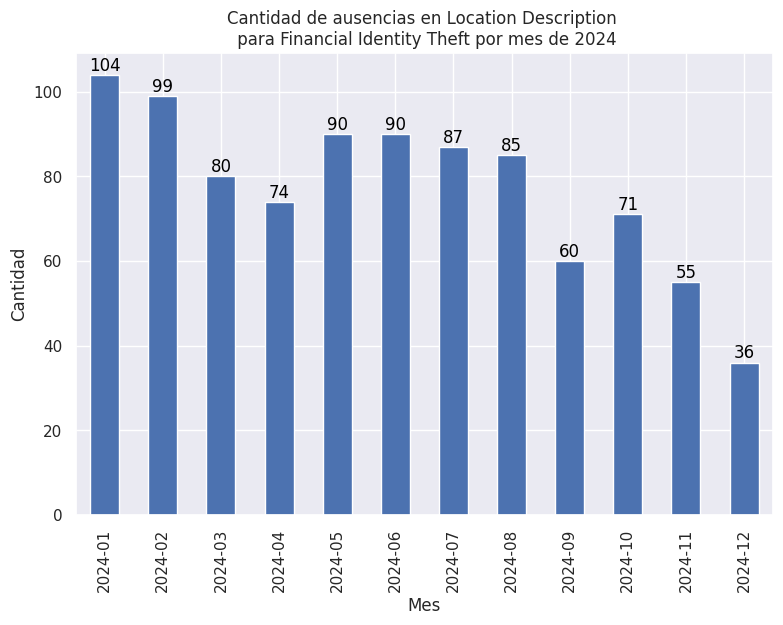

In [63]:
# solo queda mirar el Date por las dudas

fig, ax = plt.subplots(figsize=(9,6))
aux = (
    financial_thefts_df
    .groupby(df['Date'].dt.to_period('M'))
    ['missing_loc_descr']
    .sum()
)

ax = aux.plot(kind='bar', title='Cantidad de ausencias en Location Description \n para Financial Identity Theft por mes de 2024')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')

for x, y in zip(range(len(aux)), aux):
    ax.text(x, y + 0.1, f'{y}', color='black', ha='center', va='bottom')
    
plt.show()

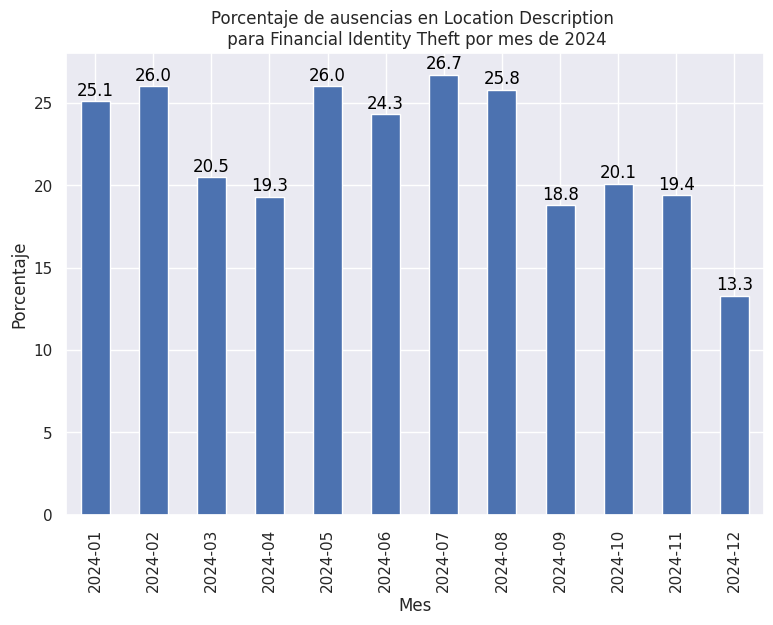

In [64]:
# repetimos con tasas
fig, ax = plt.subplots(figsize=(9,6))
aux = (
    financial_thefts_df
    .groupby(df['Date'].dt.to_period('M'))
    ['missing_loc_descr']
    .mean()
    * 100
).round(1)

ax = aux.plot(kind='bar', title='Porcentaje de ausencias en Location Description \n para Financial Identity Theft por mes de 2024')
ax.set_xlabel('Mes')
ax.set_ylabel('Porcentaje')

for x, y in zip(range(len(aux)), aux):
    ax.text(x, y + 0.1, f'{y}', color='black', ha='center', va='bottom')
    
plt.show()

* La cantidad total tiende a disminuir en el tiempo
* La tasa se mantiene aproximadamente constante

No parece haber un patrón específico por fecha.

In [65]:
# miramos los districts, pero sin mucha vuelta
# primero los districts
aux = (
    financial_thefts_df
    .groupby(['District'], observed=True)
    ['missing_loc_descr']
    .agg(['sum','size'])
    .reset_index()
    .rename(columns={'sum':'Cantidad ausencias', 'size':'Cantidad total'})
)

aux['% ausencia'] = aux['Cantidad ausencias'] / aux['Cantidad total'] * 100

res = aux.sort_values(['% ausencia','Cantidad ausencias','Cantidad total'], ascending=False).round(2)
res

,District,Cantidad ausencias,Cantidad total,% ausencia
0,1,85,197,43.15
11,12,89,238,37.39
16,18,103,284,36.27
17,19,121,366,33.06
12,14,45,159,28.30
15,17,42,149,28.19
18,20,30,133,22.56
14,16,59,264,22.35
4,5,35,163,21.47
20,24,37,173,21.39


Se observa que hay algunos distritos con mayor tasa de ausencias, pero tampoco están concentradas en algunos pocos: todos los distritos tienen tasa de ausencia positiva.

No tiene sentido por ahora al menos imputar los valores.

## Estandarización de nombres de variables

Para facilitar su uso, las variables se llevan a minúsculas.

In [66]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
)

print("🔹 Nuevos nombres de columnas:")
print('\n'.join(df.columns.tolist()))

🔹 Nuevos nombres de columnas:
case number
date
primary type
description
location description
arrest
domestic
beat
district
ward
community area
fbi code
updated on
latitude
longitude
missing_georref
missing_loc_descr


# Análisis 

A lo largo del mismo ya vamos a poder responder algunas preguntas y obtener algunos insights.



Primero utilizamos `describe` para tener un resumen a alto nivel de las variables.

In [67]:
# dates y floats
df.describe()

,date,updated on,latitude,longitude
count,257639,257639,257531.000000,257531.000000
mean,2024-07-02 12:57:33.613847296,2024-12-22 06:04:46.112274176,41.847516,-87.668934
min,2024-01-01 00:00:00,2024-01-11 15:40:55,41.644590,-87.934567
25%,2024-04-07 10:12:00,2024-12-21 15:40:46,41.772692,-87.709885
50%,2024-07-03 15:40:00,2024-12-21 15:40:46,41.866028,-87.661853
75%,2024-09-26 19:20:00,2024-12-21 15:40:46,41.910057,-87.627356
max,2024-12-31 23:58:00,2025-03-14 15:40:50,42.022548,-87.524531
std,NaN,NaN,0.086713,0.058827


Observaciones rápidas:

* Hay valores de `date` desde las 00:00 del 1/1 hasta las 23:58 del 31/12.
* La mediana de `date` ocurre a principios de julio, que es aproximadamente la mitad del año. Esto no significa que la distribución sea simétrica pero sí que el desbalance, de existir, no es extremo.
* Los valores de `updated on` también recorren casi todo el año pero además llegan hasta 2025 inclusive.
* En el caso de `updated on` sí hay un desequilibrio notorio, donde el primer cuartil ya se ubica a fines de diciembre.
* En particular, se observa que `updated on` tiene los cuartiles 1,2 y 3 en exactamente el mismo valor, por lo que se sospecha de algún evento en ese día.

No tiene sentido analizar georreferenciación en forma individual por columna, se debe contemplar aparte.

In [68]:
# categoricas
_ = df.describe(include='category').T
_['freq_rel'] = (_['freq'] / _['count']).round(2)
_.T

,case number,primary type,description,location description,beat,district,ward,community area,fbi code
count,257639,257639,257639,256630,257639,257639,257639,257639.0,257639
unique,257639,31,318,128,275,23,50,77.0,26
top,HG196301,THEFT,SIMPLE,STREET,1834,8,27,25.0,06
freq,1,60341,31493,69524,3085,17190,11965,12888.0,61115
freq_rel,0.000004,0.234208,0.122237,0.270911,0.011974,0.066721,0.046441,0.050023,0.237212


Observaciones rápidas:

* `case number`, como antes mostrado, actúa como ID.
* el `theft` como `primary type` representa casi 1/4 de los delitos y de ellos más de la mitad son `simple`.
* el 27% de los delitos ocurren en la calle.
* el `fbi code` tiene menor granularidad que el `primary type`, como antes se mostró.


In [69]:
# booleanas, excluyendo las que son flags de ausencia
_ = (
    df
    .describe(include='bool')
    .drop(columns=df.columns[df.columns.str.startswith('missing_')])
).T
_['freq_rel'] = (_['freq'] / _['count']).round(2)
_['compl'] = 1 - _['freq_rel'] 
_.T

,arrest,domestic
count,257639,257639
unique,2,2
top,False,False
freq,222431,210247
freq_rel,0.863344,0.816053
compl,0.136656,0.183947


Observaciones rápidas:

* Sólo el 13.7% de los delitos (reportados) concluye en arresto.
* Sólo el 18.4% de los delitos (reportados) es de caracter doméstico.

## Date

Ya tenemos un panorama de alto nivel de la distribución de las fechas de ocurrencia, ahora miramos en particular el comportamiento de la cantidad de crímenes por diferentes unidades de tiempo.

Con esto vamos a poder responder dos de las preguntas sugeridas: **¿Cómo varía la distribución de los crímenes a lo largo de las horas del día, los días de la semana y los meses del año?¿Se observan anomalías y/o patrones estacionales?** y **¿Cómo variaron los crímenes en la ciudad después de algún cambio o evento social importante?**

In [70]:
# Generamos las variables requeridas para poder responder
df["hora"] = df["date"].dt.hour 
df["dia_semana"] = df["date"].dt.day_name() 
df["mes"] = df["date"].dt.month 

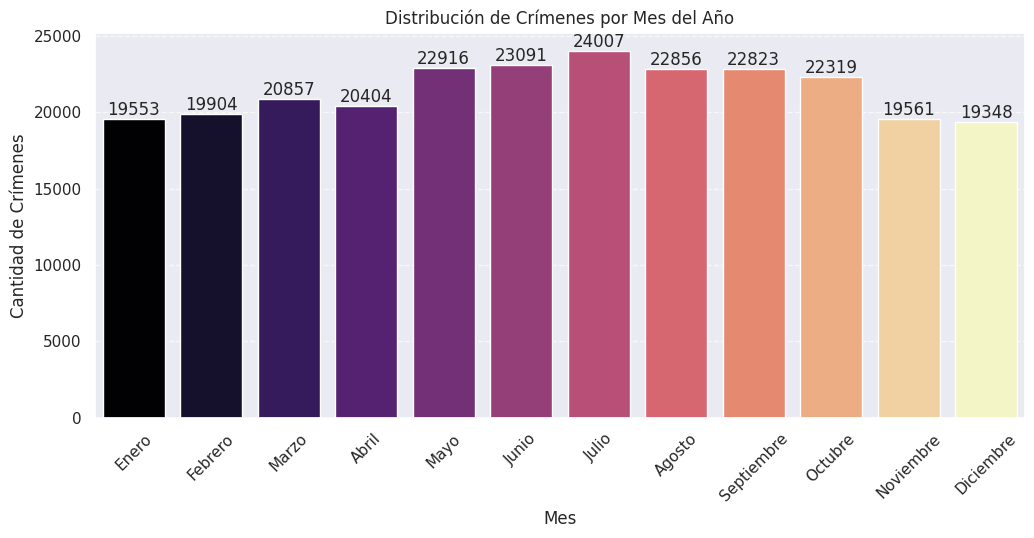

In [71]:
# distribución de las cantidades de crímenes a lo largo del año - por mes
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(df, x="mes", hue="mes", palette="magma", legend=False, ax=ax)

ax.set_title("Distribución de Crímenes por Mes del Año")
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Crímenes")
ax.set_xticks(
    range(0, 12), 
    ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], 
    rotation=45
)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

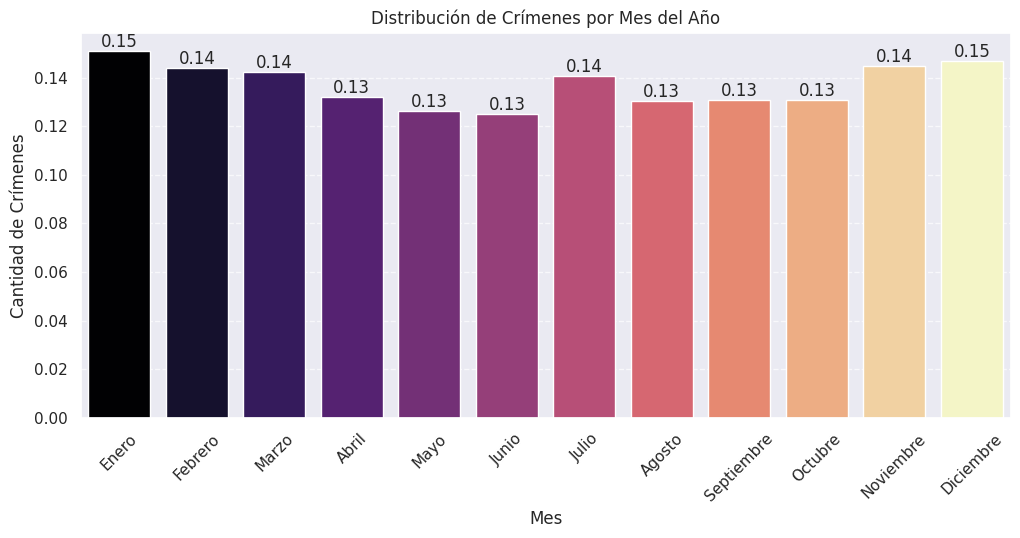

In [178]:
# distribución de las cantidades de crímenes a lo largo del año - por mes
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(df.groupby("mes")["arrest"].mean().reset_index(), x="mes", y='arrest', 
            hue="mes", palette="magma", legend=False, ax=ax)

ax.set_title("Distribución de Crímenes por Mes del Año")
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Crímenes")
ax.set_xticks(
    range(0, 12), 
    ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], 
    rotation=45
)
ax.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
    
plt.show()

* Julio es el mes con más crímenes reportados.
* Se observa un aumento de crímenes en verano (junio-julio-agosto), lo que puede estar relacionado con el aumento de actividades al aire libre y mayor movilidad de las personas.
* La estacionalidad es clara: Noviembre-Diciembre de 2024 reportan aproximadamente la misma cantidad de crímenes que Enero-Febrero.
* Si bien hay una variación importante de hasta un ~25% entre picos (19.3k - 24k), tampoco es extrema.
* En el caso de 2024, el único evento importante fueron las elecciones presidenciales en EEUU a partir de segunda mitad de año. Sin embargo, como se puede apreciar no parece haber tenido impacto en la cantidad de crímenes reportados ni en la tasa de arresto.

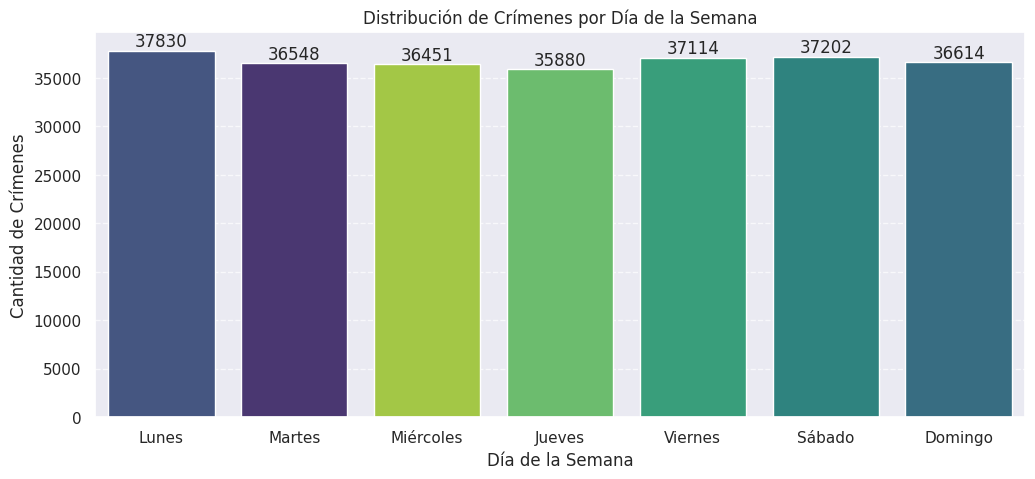

In [72]:
# ahora por día de la semana
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(df, x='dia_semana', hue='dia_semana', 
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
              palette="viridis", legend=False, ax=ax)

ax.set_title("Distribución de Crímenes por Día de la Semana")
ax.set_xlabel("Día de la Semana")
ax.set_ylabel("Cantidad de Crímenes")

ax.set_xticks(
    range(0, 7), 
    ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], 
)

for container in ax.containers:
    ax.bar_label(container)
    
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [73]:
# ¿Qué porcentaje representa el span respecto de la media?
aux =  df['dia_semana'].value_counts()

((aux.max()-aux.min()) / aux.mean()).item() * 100

5.298110922647581

* El lunes es el día con más crímenes reportados.
* En total la diferencia entre valores máximo y mínimo representa un 5% respecto del valor promedio, lo que muestra que no hay diferencias significativas en cantidad de crímenes reportados entre días de la semana.
* Como caso particular están los fines de semana (sábado y domingo), lo que contradice la creencia de que los crímenes aumentan esos días.

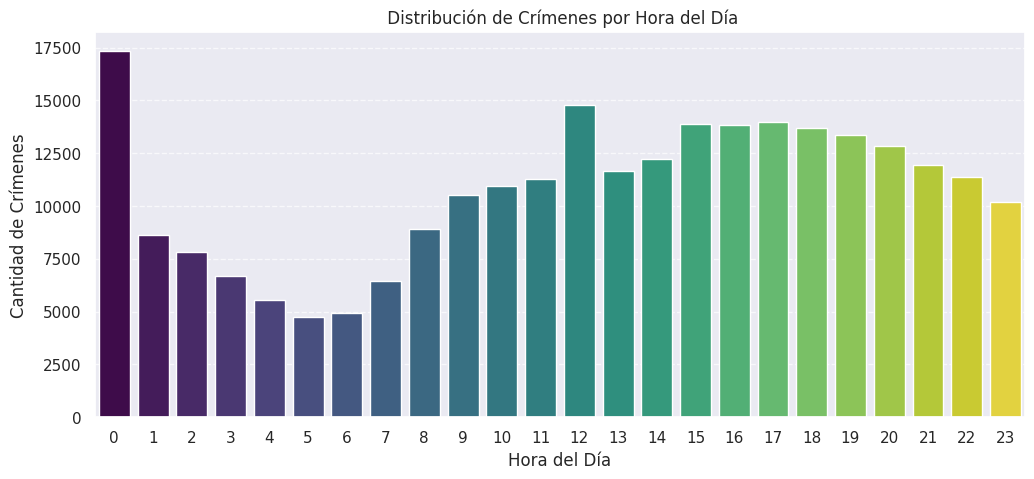

In [74]:
# ahora por hora del día
fig, ax = plt.subplots(figsize=(12, 5))
#sns.histplot(df["Hora"], bins=24, kde=True, color="blue", alpha=0.6)
sns.countplot(df, x='hora', hue='hora', 
              #order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
              palette="viridis", legend=False, ax=ax)
ax.set_title(" Distribución de Crímenes por Hora del Día")
ax.set_xlabel("Hora del Día")
ax.set_ylabel("Cantidad de Crímenes")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

* Se observa una variación importante en la cantidad de crímenes reportados a lo largo del día
* La cantidad crece durante las horas "laborales" del día, con un pico "natural" en las ~17 hs y luego decrece.
* Hay dos picos **anómalos** en las 0 y 12 horas, lo cual parece indicar valores artificiales de las mismas.

In [75]:
# vemos valores particulares
df['date'].dt.time.value_counts().head(30)

date
00:00:00    8819
12:00:00    5928
18:00:00    4321
09:00:00    4292
17:00:00    4240
19:00:00    4053
22:00:00    4043
15:00:00    4031
20:00:00    4016
16:00:00    3926
21:00:00    3909
10:00:00    3623
14:00:00    3600
13:00:00    3455
23:00:00    3127
08:00:00    3116
11:00:00    2926
01:00:00    2568
02:00:00    2321
07:00:00    2043
03:00:00    2036
15:30:00    1920
18:30:00    1855
00:01:00    1843
16:30:00    1809
17:30:00    1778
22:30:00    1720
19:30:00    1705
14:30:00    1696
20:30:00    1676
Name: count, dtype: int64

In [76]:
df['date'].dt.time.value_counts().tail(10)

date
06:33:00    20
06:17:00    20
07:02:00    17
06:51:00    17
06:49:00    17
06:32:00    16
05:51:00    15
06:29:00    14
06:31:00    14
16:38:18     1
Name: count, dtype: int64

Como se puede apreciar, hay un montón de casos para los cuales sólo se registra la hora (a veces se incluye el punto de la media hora), pero en particular se destacan las 00 y 12 horas. 

Genera sospechas respecto de negligencia en la carga de los datos o simplemente de un problema en la medición de la misma (por ejemplo, imposibilidad de determinar la hora de ocurrencia con mayor precisión).

## Updated On

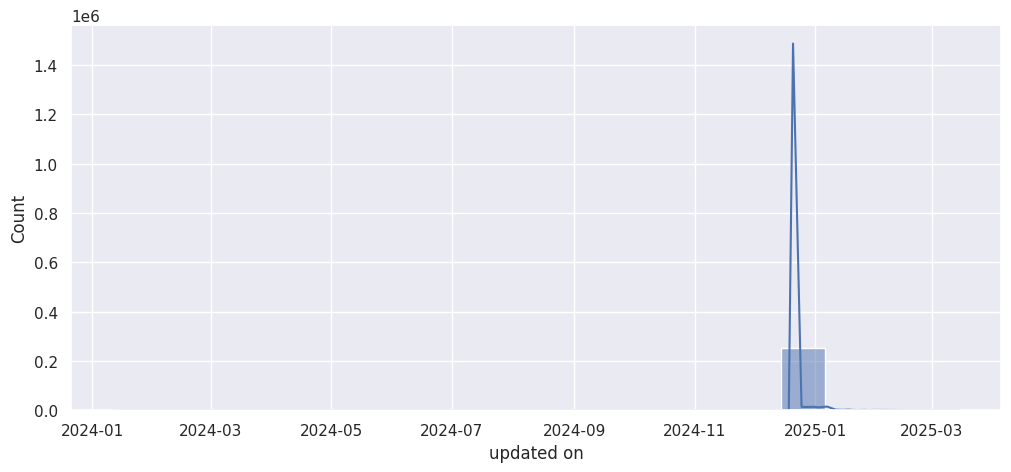

In [77]:
# observamos la distribución de la misma
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(df, x='updated on', kde=True, ax=ax)
plt.show()

In [78]:
# aparece el pico antes mencionado, vemos frecuencias
df['updated on'].value_counts().head(10)

updated on
2024-12-21 15:40:46    242735
2024-12-22 15:41:50       602
2025-01-05 15:42:25       599
2025-01-06 15:41:41       581
2024-12-31 15:41:27       576
2024-12-26 15:41:01       568
2025-01-07 15:42:52       565
2024-12-21 15:42:01       554
2024-12-24 15:41:09       551
2024-12-25 15:40:57       547
Name: count, dtype: int64

In [79]:
# en términos de % cuánto es?
df['updated on'].value_counts().head(5) * 100 / len(df)

updated on
2024-12-21 15:40:46    94.215162
2024-12-22 15:41:50     0.233660
2025-01-05 15:42:25     0.232496
2025-01-06 15:41:41     0.225509
2024-12-31 15:41:27     0.223569
Name: count, dtype: float64

Evidentemente ocurrió algún evento de tipo administrativo, del cual no se logró encontrar información en la web.
Además, esta fecha representa el 94% de los registros, por lo que no se pueden establecer patrones claros para los demás casos por falta de representatividad de la submuestra.

## Primary Type/Description

In [92]:
# usamos severity dict para establecer niveles de gravedad en base a condenas y violencia
# en base a ChatGPT y búsqueda en la web

severity_dict = {
    "HOMICIDE": 1,  # Life imprisonment or up to 30 years to life, depending on severity.
    "KIDNAPPING": 1,  # Typically 10 to 20 years, can be life in aggravated cases.
    "CRIMINAL SEXUAL ASSAULT": 1,  # Often 10 to 30 years, with possible life sentences.
    "ROBBERY": 2,  # Typically 5 to 20 years, depending on use of weapon.
    "ARSON": 2,  # 5 to 15 years, longer if people are injured.
    "BURGLARY": 2, # 5 to 15 years, depending on whether it's aggravated (e.g., with a weapon)
    "BATTERY": 3,  # Typically 2 to 5 years, but can be more for aggravated battery.
    "ASSAULT": 3,  # 2 to 5 years, more severe if aggravated.
    "CRIMINAL DAMAGE": 3,  # 1 to 3 years, depending on property damage.
    "NARCOTICS": 3,  # 2 to 15 years, depending on type and quantity of drugs.
    "MOTOR VEHICLE THEFT": 3,  # 3 to 7 years, longer for repeat offenders.
    "SEX OFFENSE": 3,  # 5 to 20 years, varying based on type (e.g., rape, molestation).
    "WEAPONS VIOLATION": 3,  # 1 to 10 years, depending on whether the weapon is used or not.
    "HUMAN TRAFFICKING": 3,  # 5 to 25 years, with life sentences for severe cases.
    "STALKING": 3,  # 1 to 5 years, depending on whether aggravated.
    "INTIMIDATION": 3, # 1 to 5 years, depending on the severity of the threat and harm or coercion involved.
    "THEFT": 3, # 1 to 5 years for more serious cases (like grand theft), but lower for minor thefts
    "INTERFERENCE WITH PUBLIC OFFICER": 4,  # Typically 1 to 3 years, varies by state.
    "LIQUOR LAW VIOLATION": 4,  # 6 months to 2 years, depending on the offense.
    "PROSTITUTION": 4,  # 6 months to 2 years, depending on aggravating circumstances.
    "PUBLIC INDECENCY": 4,  # 6 months to 1 year, typically a misdemeanor.
    "PUBLIC PEACE VIOLATION": 4,  # Typically 6 months to 1 year.
    "CRIMINAL TRESPASS": 4,  # Typically 6 months to 2 years, depending on severity.
    "DECEPTIVE PRACTICE": 4,  # 1 to 5 years, especially for fraud-related offenses.
    "OTHER NARCOTIC VIOLATION": 4,  # Typically 1 to 5 years, depending on severity.
    "GAMBLING": 5,  # 1 to 3 years, depending on the jurisdiction.
    "OTHER OFFENSE": 5,  # Typically 1 to 3 years, depending on specific offense.
    "NON-CRIMINAL": 5,  # No sentence, as it's not a criminal activity.
    "OBSCENITY": 5,  # Typically 1 to 3 years, depending on the offense's nature.
    "CONCEALED CARRY LICENSE VIOLATION": 5,  # Typically 1 to 3 years.
    "OFFENSE INVOLVING CHILDREN": 2  # Severe cases like child abuse or exploitation can lead to long sentences (e.g., 10+ years).
}


df['severity_rank'] = df['primary type'].map(severity_dict)

**¿Qué tan concentrados están los tipos de crímenes? ¿Los crímenes más severos son raros o son comunes?**

In [93]:
# miramos popularidad
aux = (
    df[['primary type','description']]
    .groupby('primary type', observed=True)
    ['description']
    .agg(['size','nunique'])
    .rename(columns={'size':'count','nunique':'n_subtypes'})
    .sort_values('count',ascending=False)
    .reset_index()
)

# % individual y acumulado
aux['perc'] = (aux['count'] * 100 / len(df)).round(2)
aux['accum_perc'] = (aux['count'].cumsum() * 100 / len(df)).round(2)

# arrest % simple
arrest_rates = (
    df[['primary type','arrest']]
    .groupby('primary type', observed=True)
    ['arrest']
    .mean()
    .pipe(lambda x: x*100)
    .round(2)
    .rename('arrest_perc')
    .reset_index()
)

aux = aux.merge(arrest_rates, on='primary type')

aux['severity_rank'] = aux['primary type'].map(severity_dict)

aux

,primary type,count,n_subtypes,perc,accum_perc,arrest_perc,severity_rank
0,THEFT,60341,10,23.42,23.42,6.74,3
1,BATTERY,46061,26,17.88,41.30,16.88,3
2,CRIMINAL DAMAGE,28531,8,11.07,52.37,3.84,3
3,ASSAULT,23449,15,9.10,61.47,10.67,3
4,MOTOR VEHICLE THEFT,21673,12,8.41,69.89,2.75,3
5,OTHER OFFENSE,16986,41,6.59,76.48,19.19,5
6,DECEPTIVE PRACTICE,15604,36,6.06,82.54,3.19,4
7,ROBBERY,9122,14,3.54,86.08,7.42,2
8,BURGLARY,8413,5,3.27,89.34,5.12,2
9,WEAPONS VIOLATION,7836,11,3.04,92.38,61.22,3


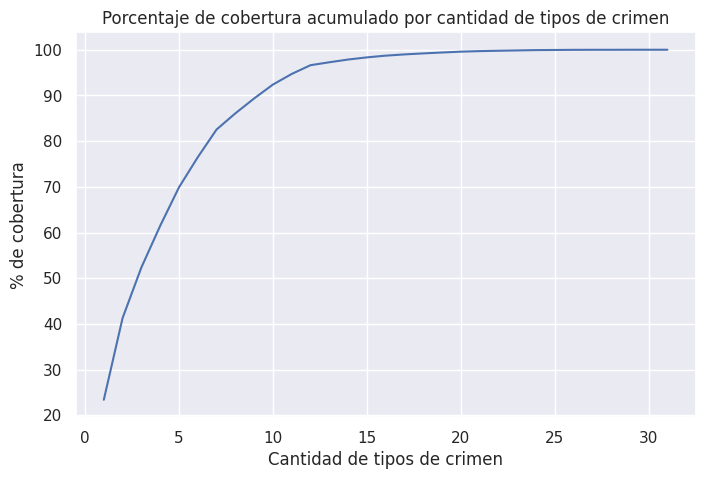

In [94]:
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(aux, x=aux.index+1, y='accum_perc', ax=ax)
ax.set_xlabel('Cantidad de tipos de crimen')
ax.set_ylabel('% de cobertura')
ax.set_title('Porcentaje de cobertura acumulado por cantidad de tipos de crimen')
plt.show()

* Los crímenes están muy concentrados
    * El primero (robo) es casi 1/4 de los crímenes
    * Los primeros 3 representan 1/2 
    * Los primeros 10 el 90%
    * Sobre un total de 31 tipos principales
* Los crímenes más severos (rank 1) son bastante "raros" (el más común es sexual assault con 0.6%)

**¿Cómo interactúan la tasa de arresto con la frecuencia relativa de ocurrencia?**

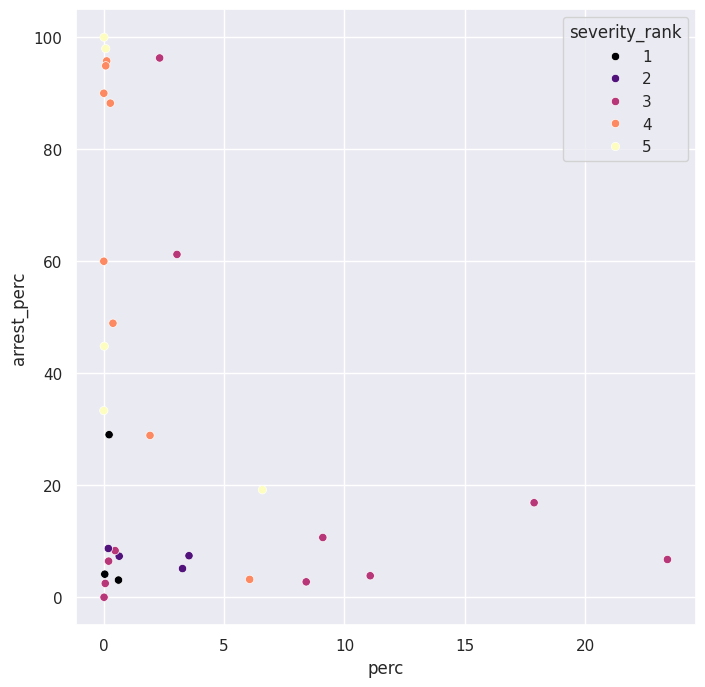

In [95]:
fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(aux, x='perc', y='arrest_perc', hue='severity_rank', ax=ax, palette='magma')

plt.show()

* Los crímenes más populares, independientemente de su severidad, tienen baja tasa de arresto (<20%)
* Los crímenes con mayor tasa de arresto son todos de baja severidad (!!)
* Los crímenes más graves tienen tasa de arresto baja pero también tasa de ocurrencia baja

**¿El porcentaje de arresto se correlaciona con la severidad de los crímenes?**

In [96]:
df[['arrest','severity_rank']].corr().iloc[0,1].item()

0.07195422814013733

¡Casi nada! Lo mostramos como grupo para que se visualice mejor:

In [97]:
(
    df[['arrest','severity_rank']]
    .groupby('severity_rank')
    ['arrest']
    .mean()
    .pipe(lambda x: x*100)
    .round(2)
    .rename('arrest %')
    .reset_index()
)

,severity_rank,arrest %
0,1,9.64
1,2,6.46
2,3,13.65
3,4,15.41
4,5,20.27


Definitivamente no es ni necesario realizar un ANOVA para observar que la tasa de arrestos varía considerablemente con el nivel de severidad (¡en la dirección contraria!).

## District

Esta variable tiene que tratarse con cuidado, ya que estará naturalmente correlacionada con una variable no disponible, que es la densidad poblacional de cada zona. Es esperar que en una zona con el doble de habitantes haya el doble de crímenes reportados, y ambas zonas serían "igual de seguras".

Entre otras preguntas, se pueden responder las sugeridas **¿Hay diferencias significativas entre el número de crímenes en distintos distritos o comunas?** y **¿Están las fuerzas policiales bien distribuidas en relación a las características de cada zona?**

In [103]:
# cantidad de crímenes denunciados y con arrestos por distrito
aux = (
    df[['district','arrest']]
    .groupby('district', observed=True)
    ['arrest']
    .agg(['sum','size'])
    .rename(columns={'sum':'arrests','size':'count'})
    .sort_values('count',ascending=False)
    .reset_index()
)

aux['arrest_perc'] = (aux['arrests'] / aux['count']) * 100

aux.round(2)

,district,arrests,count,arrest_perc
0,8,2162,17190,12.58
1,12,1393,16114,8.64
2,1,2662,14831,17.95
3,6,1821,14773,12.33
4,19,1297,14026,9.25
5,4,1324,13646,9.70
6,11,3672,13604,26.99
7,18,1894,13493,14.04
8,25,1877,13181,14.24
9,2,1169,13117,8.91


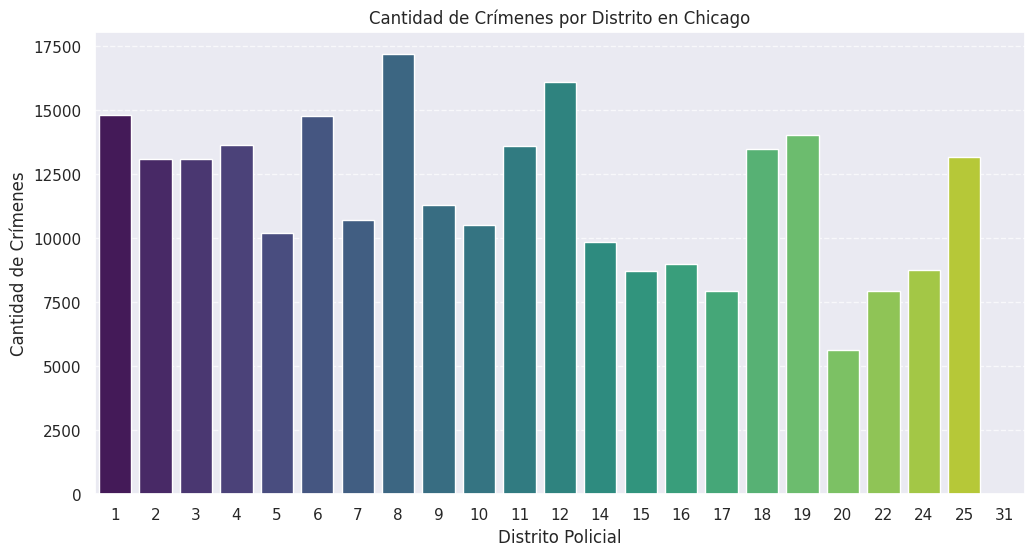

In [128]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(aux, x='district', y='count', palette="viridis", hue='district', legend=False, ax=ax)

# Personalizar el gráfico
ax.set_title("Cantidad de Crímenes por Distrito en Chicago")
ax.set_xlabel("Distrito Policial")
ax.set_ylabel("Cantidad de Crímenes")
#ax.set_xticks(rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

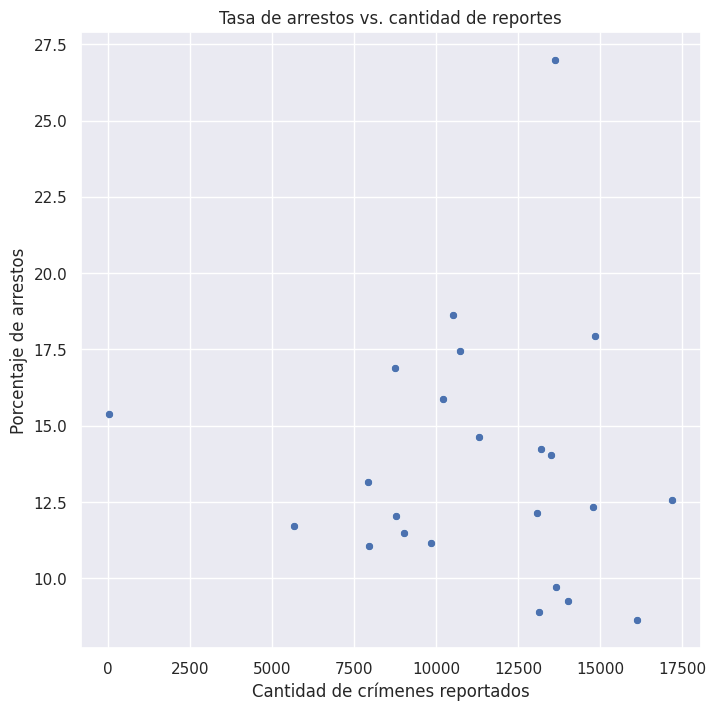

In [131]:
# cantidad de crímenes vs tasa de arrestos
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(aux, x = 'count', y='arrest_perc',
                #palette="viridis", hue='district', legend=False, 
                ax=ax)
ax.set_xlabel('Cantidad de crímenes reportados')
ax.set_ylabel('Porcentaje de arrestos')
ax.set_title('Tasa de arrestos vs. cantidad de reportes')
plt.show()

* La tasa de arrestos varía considerablemente, entre 8.6 y 27%, aunque esto podría deberse también a una diferencia en distribuciones de los tipos de delito.
* Hay una enorme diferencia en el número de crímenes reportados, donde el distrito 8 reportó 17k crímenes mientras que el 21 reportó sólo 5.6k (un tercio del dist. 8).
* Se observa un outlier en el distrito 31, con sólo 13 crímenes reportados.
* En términos de tasa de arrestos, el distrito 11 también se puede considerar outlier, teniendo un 27%, respecto del siguiente con 18.6%

**¿Los del distrito 31 no cargaron porque les faltaba el sistema durante parte del año?**

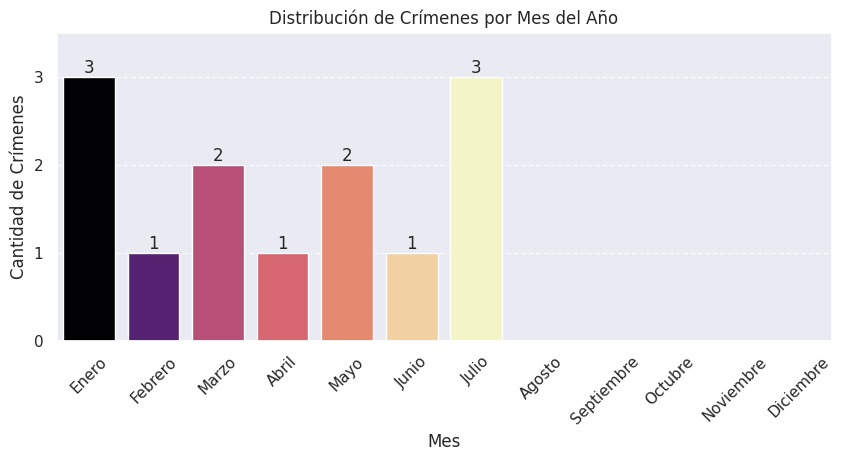

In [120]:
# distribución de las cantidades de crímenes a lo largo del año - por mes
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(df[df['district']==31], x="mes", hue="mes", palette="magma", legend=False, ax=ax)

ax.set_title("Distribución de Crímenes por Mes del Año")
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Crímenes")
ax.set_xlim(ax.get_xlim()[0],11.5)
ax.set_ylim(0,3.5)
ax.set_xticks(
    range(0, 12), 
    ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], 
    rotation=45
)
ax.set_yticks(range(0,4))
ax.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

Si bien pareciera que perdieron capacidad de carga posterior a julio, se reportó una cantidad ínfima de crímenes en todos los meses anteriores. El problema evidentemente no es sólo no-disponibilidad de sistema.

**¿La distribución de tipos de crimen por distrito es similar o es diferente?**

In [142]:
xs_df = df.pivot_table(
    index='district',
    columns='primary type',
    values='arrest',
    aggfunc='count',
    observed=True,
    fill_value=0
)

xs_df

primary type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
district,,,,,,,,,,,,,,,,,,,,,
1,13,906,2032,265,18,1212,77,503,1388,6,...,0,613,2,1,127,469,67,18,5327,262
2,8,1253,2265,399,7,1629,92,200,663,4,...,0,825,0,0,53,376,54,41,3103,411
3,30,1465,2839,571,6,1554,77,238,553,0,...,0,879,0,0,35,440,50,19,2192,715
4,40,1546,2646,537,1,1808,96,202,583,1,...,0,1071,3,0,16,443,59,20,2335,559
5,32,1165,1946,279,6,1421,59,149,435,3,...,0,842,26,0,25,263,38,18,1740,443
6,45,1696,3045,484,4,1983,73,251,564,2,...,0,1239,0,1,59,629,52,43,2278,565
7,36,1182,2452,230,17,1264,62,120,376,0,...,1,873,0,1,40,471,43,17,1373,660
8,51,1711,2954,551,25,2068,69,263,1055,0,...,0,1483,88,1,65,534,99,42,3117,555
9,37,1178,2268,401,6,1159,53,211,629,0,...,0,763,4,0,39,598,57,19,2233,498


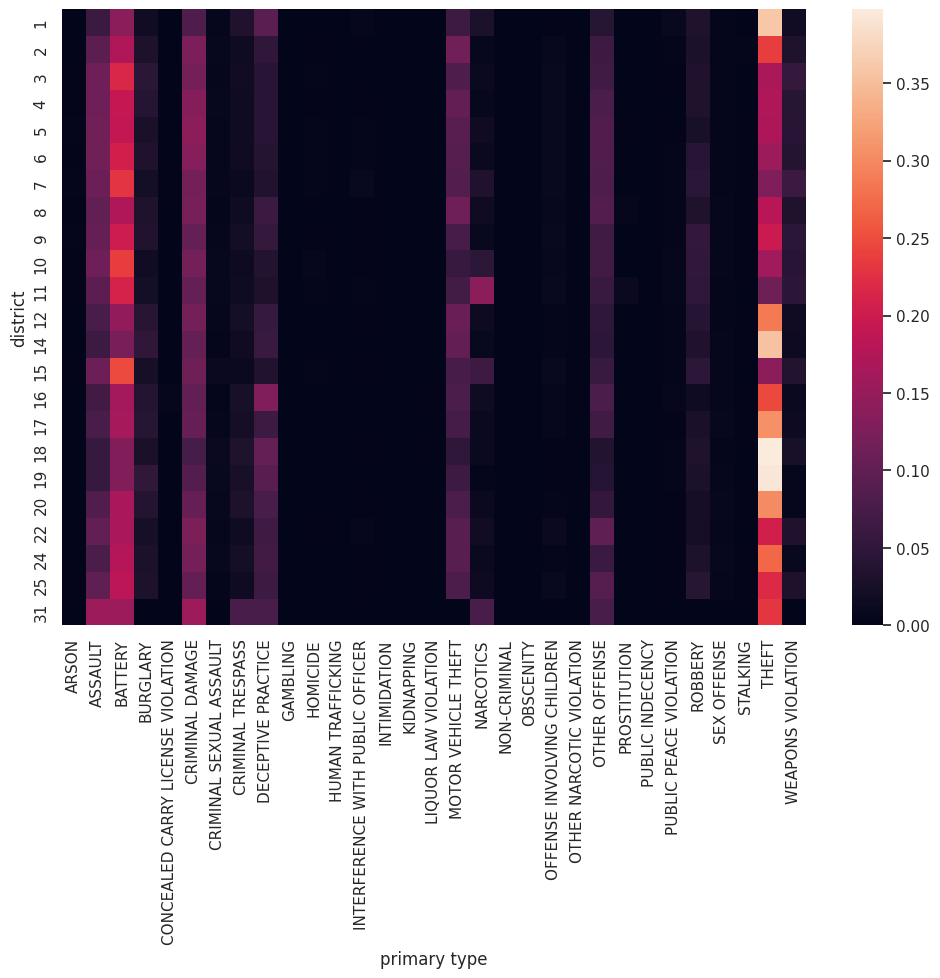

In [171]:
# normalizamos por distrito y hacemos un heatmap
xs_df_norm = xs_df.apply(lambda x: x/x.sum(), axis=1)

fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(xs_df_norm, ax=ax,
            #nnot=True, fmt=".1f", linewidth=.5
           )
plt.show()

La distribución de crímenes por distrito es bastante similar, claramente dominada por los principales crímenes (robo, asalto, lesión), pero hay variaciones. Por ejemplo, el delito de narcóticos es mucho más preponderante en algunos distritos que en otros (ver distritos 11 vs 2).

Retomando la diferencia de tasas de arrestos y teniendo en cuenta que las variaciones en distribución de los tipos de delito no son abismales, estamos en posición de afirmar que la distribución de fuerza policial parece subóptima.

# TODO

* Decir algo de location description
* Agregar la cantidad de crímenes por Ward y Community Area como hizo Mauro
* Revisar que no falte nada

# Old


🔹 Moda (Valor mas frencuente)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_41372\798707700.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_tipos_crimen.values, y=conteo_tipos_crimen.index, palette="viridis")


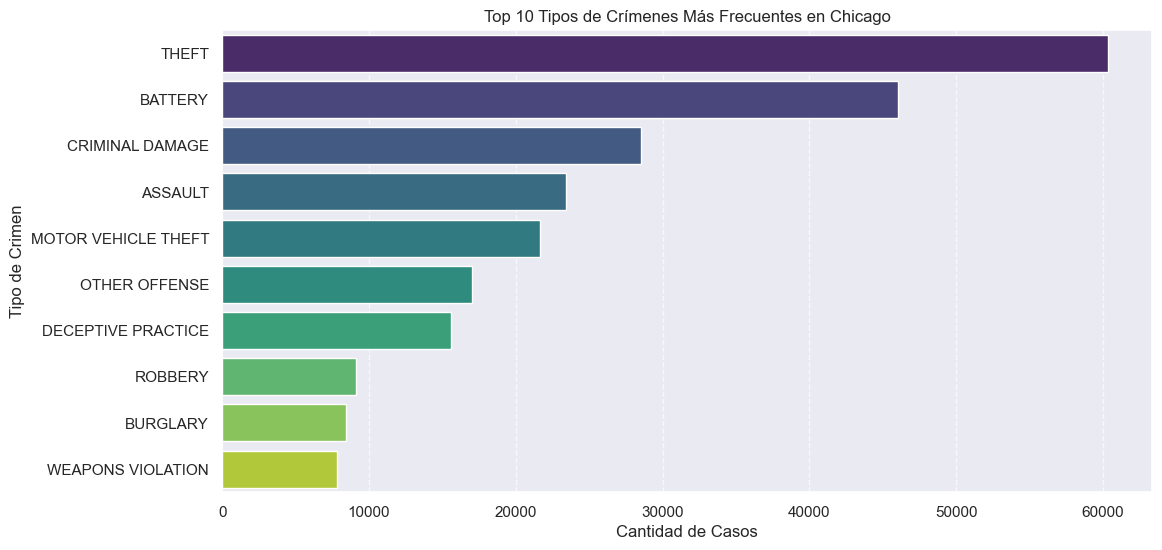


 El delito mas frecuente:  THEFT


In [289]:
#======================================
# Moda - Top 10 crímenes más comunes
#======================================
print("\n🔹 Moda (Valor mas frencuente)")

# Análisis de Moda: Tipo de Crimen más frecuente
tipo_crimen_mas_frecuente = df["primary type"].mode()[0]

# Contar la frecuencia de cada tipo de crimen
conteo_tipos_crimen = df["primary type"].value_counts().head(10)  # Top 10 crímenes más comunes

# Gráfico de Barras: Delitos más frecuentes
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_tipos_crimen.values, y=conteo_tipos_crimen.index, palette="viridis")

plt.title("Top 10 Tipos de Crímenes Más Frecuentes en Chicago")
plt.xlabel("Cantidad de Casos")
plt.ylabel("Tipo de Crimen")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Mostrar el delito más frecuente
print("\n El delito mas frecuente: ", tipo_crimen_mas_frecuente)

In [290]:
# 1.1 Dispersion
print("\n🔹 Varianza (Dispesion respecto a la media)")
varianza = df.var(numeric_only=True)
print(varianza)

print("\n🔹 Desviacion Estandar")
desviacion_estandar = df.std(numeric_only=True)
print(desviacion_estandar)


🔹 Varianza (Dispesion respecto a la media)
arrest                    0.117982
domestic                  0.150111
beat                 502990.159089
district                 50.222878
ward                    194.535782
community area          466.757122
missing_georref           0.000419
missing_loc_descr         0.003901
dtype: float64

🔹 Desviacion Estandar
arrest                 0.343485
domestic               0.387442
beat                 709.217991
district               7.086810
ward                  13.947608
community area        21.604563
missing_georref        0.020470
missing_loc_descr      0.062458
dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_41372\1858179258.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimenes_por_distrito.index, y=crimenes_por_distrito.values, palette="viridis")


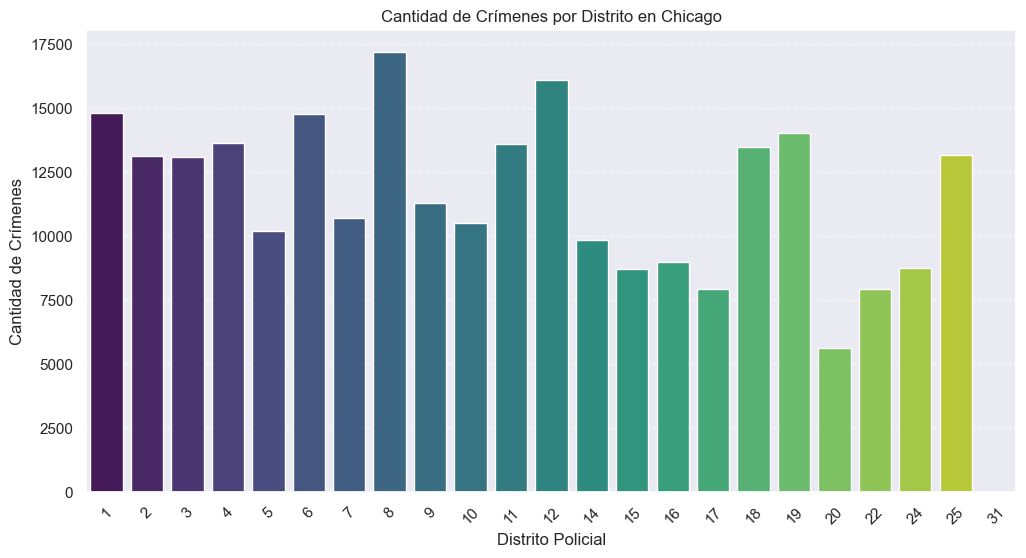

In [291]:
# ========================================
# Cantidad total de crímenes por distrito
#=========================================
crimenes_por_distrito = df["district"].value_counts().sort_values(ascending=False)

# Gráfico de Barras: Distritos con Más Crímenes
plt.figure(figsize=(12, 6))
sns.barplot(x=crimenes_por_distrito.index, y=crimenes_por_distrito.values, palette="viridis")

# Personalizar el gráfico
plt.title("Cantidad de Crímenes por Distrito en Chicago")
plt.xlabel("Distrito Policial")
plt.ylabel("Cantidad de Crímenes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

## 1. ¿Cómo varía la distribución de los crímenes a lo largo de las horas del día, los días de la semana y los meses del año?¿Se observan anomalías y/o patrones estacionales?

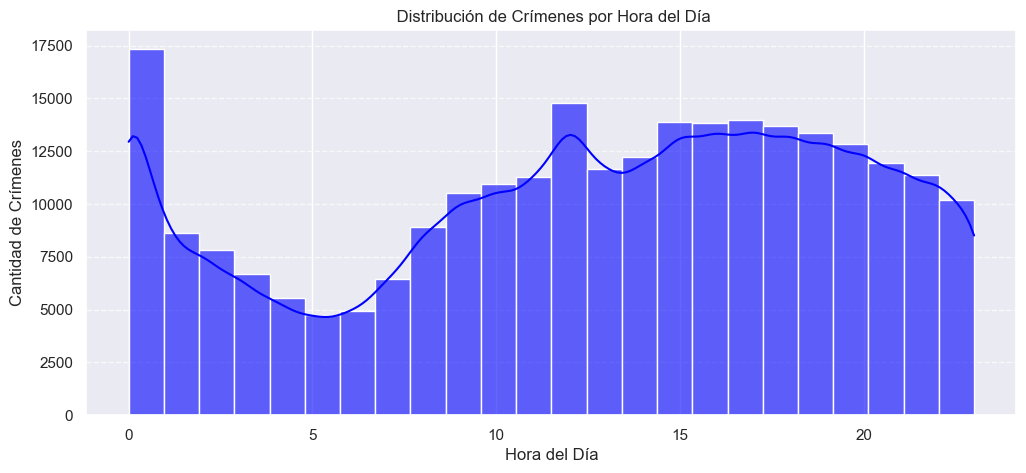

In [292]:
# Se convierte la fecha en formato datetime
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Extraer información temporal para el análisis
df["Hora"] = df["date"].dt.hour  # Extraer la hora del crimen
df["Día de la Semana"] = df["date"].dt.day_name()  # Extraer el día de la semana
df["Mes"] = df["date"].dt.month  # Extraer el mes

# ======================================================
#  Gráfico 1: Distribución de Crímenes por Hora del Día
# ======================================================
plt.figure(figsize=(12, 5))
sns.histplot(df["Hora"], bins=24, kde=True, color="blue", alpha=0.6)
plt.title(" Distribución de Crímenes por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Crímenes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



###  Variación de Crímenes por Hora del Día
Pico de crímenes ocurre a las 00:00 horas (medianoche).
Hay un aumento de crímenes en las noches, lo que sugiere que el crimen es más frecuente en horarios nocturnos.
Madrugada y mañana tienen menos crímenes.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_41372\849075391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Día de la Semana"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")


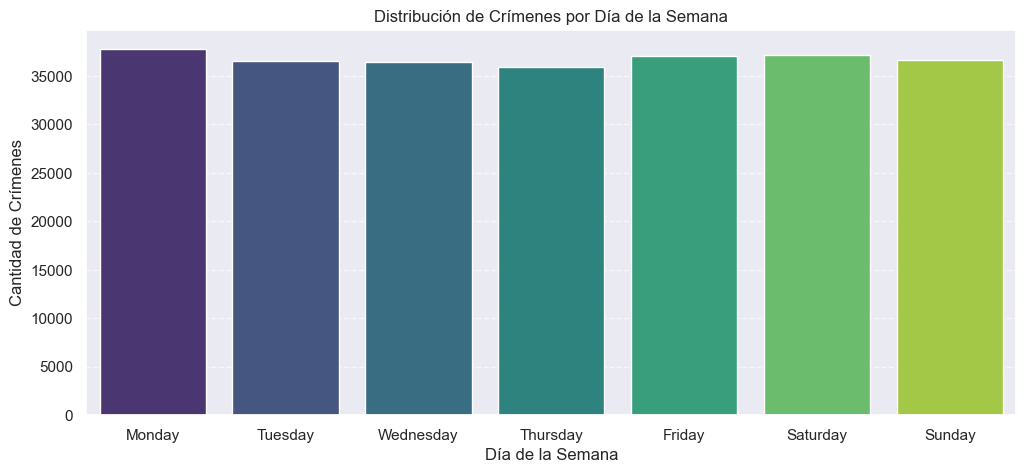

In [293]:
# ==========================================================
#  Gráfico 2: Distribución de Crímenes por Día de la Semana
# ==========================================================
plt.figure(figsize=(12, 5))
sns.countplot(x=df["Día de la Semana"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")
plt.title("Distribución de Crímenes por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad de Crímenes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Variación de Crímenes por Día de la Semana
- El lunes es el día con más crímenes reportados.
- Fines de semana (sábado y domingo) no muestran un aumento significativo, lo que contradice la creencia de que los crímenes aumentan esos días.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_41372\2447030409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Mes"], palette="magma")


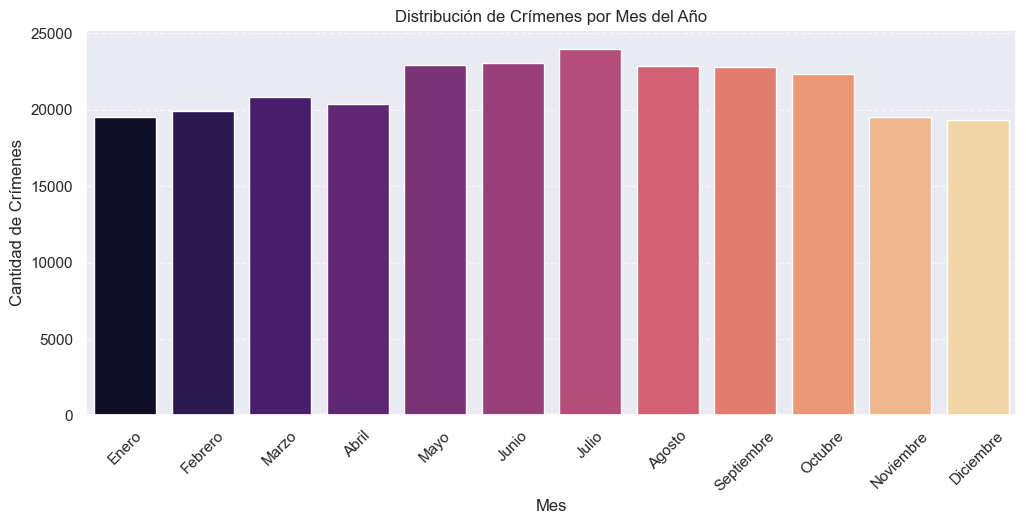

In [294]:
# ====================================================
# Gráfico 3: Distribución de Crímenes por Mes del Año
# ====================================================
plt.figure(figsize=(12, 5))
sns.countplot(x=df["Mes"], palette="magma")
plt.title("Distribución de Crímenes por Mes del Año")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Crímenes")
plt.xticks(range(0, 12), ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Variación de Crímenes por Mes del Año
- Julio es el mes con más crímenes reportados.
- Se observa un aumento de crímenes en verano (junio-julio-agosto), lo que puede estar relacionado con el aumento de actividades al aire libre y mayor movilidad de las personas.

In [295]:
# ==================================================================================================================
# Análisis de Anomalías y Patrones Estacionales
# Se proceden a calcular la Moda, Media, Mediana, Percentiles y Desviacion Estandar para la hora, dia y mes del año
# ==================================================================================================================
hora_pico = df["Hora"].mode()[0]  # Hora con más crímenes
media_hora = df["Hora"].mean()
mediana_hora = df["Hora"].median()
percentiles_hora = df["Hora"].quantile([0.25, 0.50, 0.75])
std_hora = df["Hora"].std()

# Media y Mediana de los crímenes por día de la semana (convirtiendo a números)
dias_semana_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Dia_Num"] = df["Día de la Semana"].apply(lambda x: dias_semana_ordenados.index(x) if x in dias_semana_ordenados else None)

dia_pico = df["Día de la Semana"].mode()[0]  # Día con más crímenes
media_dia = df["Dia_Num"].mean()
mediana_dia = df["Dia_Num"].median()
percentiles_dia = df["Dia_Num"].quantile([0.25, 0.50, 0.75])
std_dia = df["Dia_Num"].std()

mes_pico = df["Mes"].mode()[0]  # Mes con más crímenes
media_mes = df["Mes"].mean()
mediana_mes = df["Mes"].median()
percentiles_mes = df["Mes"].quantile([0.25, 0.50, 0.75])
std_mes = df["Mes"].std()

# Convertir el número del día y mes a su nombre correspondiente
nombre_mediana_dia = dias_semana_ordenados[int(mediana_dia)]
nombre_mediana_mes = calendar.month_name[int(mediana_mes)]
# Obtener el nombre del mes
nombre_mes_pico = calendar.month_name[mes_pico]

print("\n--=== Análisis de Anomalías y Patrones Estacionales ===--\n")

# Análisis por Hora
print("** Distribución de Crímenes por Hora del Día **")
print(f"Hora con más crímenes (Moda): {hora_pico}:00 hrs")
print(f"Hora promedio de crímenes (Media): {media_hora:.2f} hrs")
print(f"Hora central de crímenes (Mediana): {mediana_hora:.2f} hrs")
print(f"Desviación estándar: {std_hora:.2f} hrs")
print(f"Percentiles: 25%={percentiles_hora[0.25]:.2f}, 50%={percentiles_hora[0.50]:.2f}, 75%={percentiles_hora[0.75]:.2f}\n")

# Análisis por Día de la Semana
print("** Distribución de Crímenes por Día de la Semana **")
print(f"Día con más crímenes (Moda): {dia_pico}")
print(f"Día promedio de crímenes (Media): {dias_semana_ordenados[int(media_dia)]}")
print(f"Día central de crímenes (Mediana): {nombre_mediana_dia}")
print(f"Desviación estándar: {std_dia:.2f} días")
print(f"Percentiles: 25%={dias_semana_ordenados[int(percentiles_dia[0.25])]}, 50%={dias_semana_ordenados[int(percentiles_dia[0.50])]}, 75%={dias_semana_ordenados[int(percentiles_dia[0.75])]}\n")

# Análisis por Mes
print("**Distribución de Crímenes por Mes del Año **")
print(f"Mes con más crímenes (Moda): {nombre_mes_pico}")
print(f"Mes promedio de crímenes (Media): {calendar.month_name[int(media_mes)]}")
print(f"Mes central de crímenes (Mediana): {nombre_mediana_mes}")
print(f"Desviación estándar: {std_mes:.2f} meses")
print(f"Percentiles: 25%={calendar.month_name[int(percentiles_mes[0.25])]}, 50%={calendar.month_name[int(percentiles_mes[0.50])]}, 75%={calendar.month_name[int(percentiles_mes[0.75])]}")


--=== Análisis de Anomalías y Patrones Estacionales ===--

** Distribución de Crímenes por Hora del Día **
Hora con más crímenes (Moda): 0:00 hrs
Hora promedio de crímenes (Media): 12.52 hrs
Hora central de crímenes (Mediana): 13.00 hrs
Desviación estándar: 6.85 hrs
Percentiles: 25%=8.00, 50%=13.00, 75%=18.00

** Distribución de Crímenes por Día de la Semana **
Día con más crímenes (Moda): Monday
Día promedio de crímenes (Media): Wednesday
Día central de crímenes (Mediana): Thursday
Desviación estándar: 2.01 días
Percentiles: 25%=Tuesday, 50%=Thursday, 75%=Saturday

**Distribución de Crímenes por Mes del Año **
Mes con más crímenes (Moda): July
Mes promedio de crímenes (Media): June
Mes central de crímenes (Mediana): July
Desviación estándar: 3.35 meses
Percentiles: 25%=April, 50%=July, 75%=September


#  Análisis de Anomalías y Patrones Estacionales

## 🕒 Distribución de Crímenes por Hora del Día
- **Moda:** `00:00 hrs` → Hora con más crímenes.
- **Media:** `12:52 hrs` → Promedio de la hora del crimen.
- **Mediana:** `13:00 hrs` → Hora central del crimen.
- **Desviación estándar:** `6.85 hrs` → Los crímenes están bastante dispersos a lo largo del día.
- **Percentiles:**
  - 🔹 **25%** de los crímenes ocurren antes de las `08:00 hrs`.
  - 🔹 **50%** ocurren antes de las `13:00 hrs` (**Mediana**).
  - 🔹 **75%** ocurren antes de las `18:00 hrs`.

✔️ **Conclusión:** Aunque el **pico** es a medianoche, la mayor concentración de crímenes ocurre entre **mediodía y las 6 PM**.

---

## 🗓 Distribución de Crímenes por Día de la Semana
- **Moda:** `Monday (Lunes)` → Día con más crímenes.
- **Media:** `Wednesday (Miércoles)` → Promedio del día con crímenes.
- **Mediana:** `Thursday (Jueves)` → Día central en la distribución.
- **Desviación estándar:** `2.01 días` → Los crímenes están distribuidos de manera amplia en la semana.
- **Percentiles:**
  - 🔹 **25%** de los crímenes ocurren antes del `martes`.
  - 🔹 **50%** ocurren antes del `jueves` (**Mediana**).
  - 🔹 **75%** ocurren antes del `sábado`.

✔️ **Conclusión:** Aunque los **lunes** tienen más crímenes, la actividad criminal se mantiene **estable durante toda la semana**, con un **pequeño pico en jueves**.

---

## 📅 Distribución de Crímenes por Mes del Año
- **Moda:** `July (Julio)` → Mes con más crímenes.
- **Media:** `June (Junio)` → Promedio de los crímenes por mes.
- **Mediana:** `July (Julio)` → Mes central en la distribución.
- **Desviación estándar:** `3.35 meses` → Los crímenes están distribuidos a lo largo del año, pero con una **tendencia fuerte en verano**.
- **Percentiles:**
  - 🔹 **25%** de los crímenes ocurren antes de `abril`.
  - 🔹 **50%** ocurren antes de `julio` (**Mediana**).
  - 🔹 **75%** ocurren antes de `septiembre`.

✔️ **Conclusión:** **Los crímenes aumentan en verano, con julio como el mes más crítico**, pero hay una **distribución gradual durante el año**.

 # ¿Hay diferencias significativas entre el número de crímenes en distintos distritos o comunas?

En este análisis exploramos la cantidad de crímenes reportados en cada **distrito (ward)** y **comunidad (community area)** en la ciudad de Chicago durante el año 2024 para observar si hay diferencias significativas entre zonas.

In [296]:
# Contar los crímenes por distrito y por comunidad
crimenes_por_distrito = df['ward'].value_counts().sort_index()
crimenes_por_comunidad = df['community area'].value_counts().sort_index()

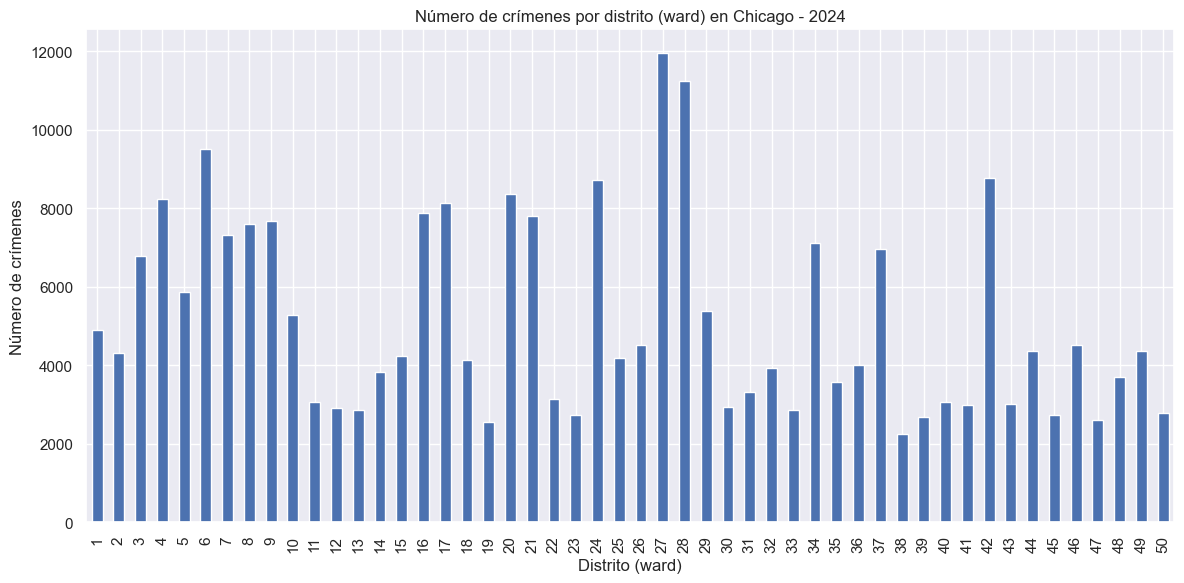

In [297]:
# Visualizar los crímenes por distrito
plt.figure(figsize=(12, 6))
crimenes_por_distrito.plot(kind='bar')
plt.title('Número de crímenes por distrito (ward) en Chicago - 2024')
plt.xlabel('Distrito (ward)')
plt.ylabel('Número de crímenes')
plt.grid(True)
plt.tight_layout()
plt.show()

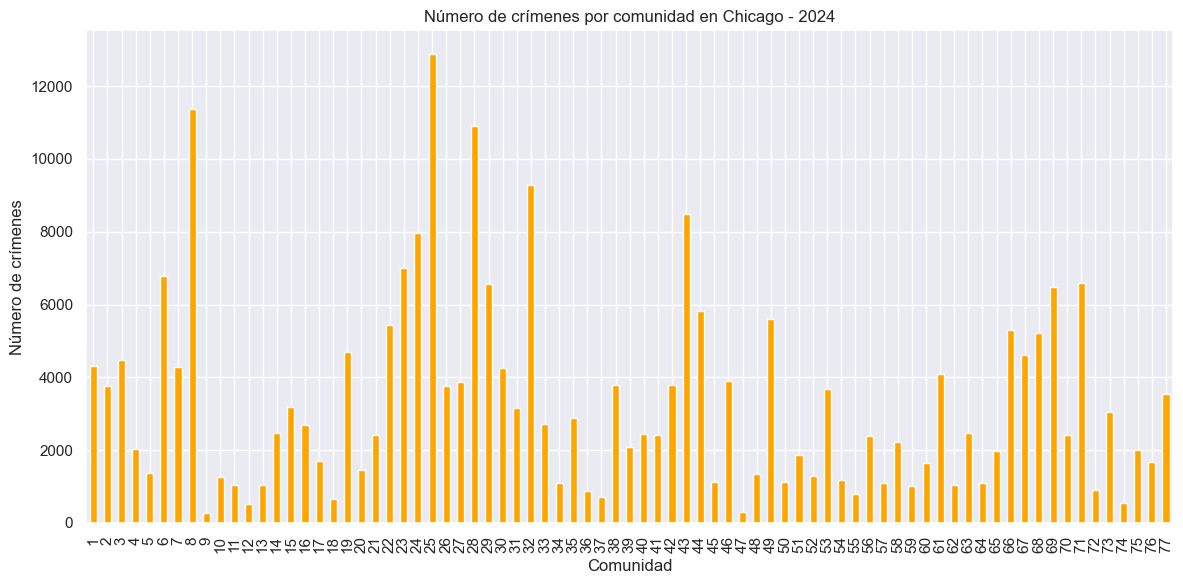

In [298]:
# Visualizar los crímenes por comunidad
plt.figure(figsize=(12, 6))
crimenes_por_comunidad.plot(kind='bar', color='orange')
plt.title('Número de crímenes por comunidad en Chicago - 2024')
plt.xlabel('Comunidad')
plt.ylabel('Número de crímenes')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusión
Se observan diferencias significativas en la cantidad de crímenes entre distintas zonas de la ciudad, lo cual indica que algunas áreas requieren mayor atención y recursos.

# ¿Están las fuerzas policiales bien distribuidas en relación a las características de cada zona?

Analizaremos la proporción de arrestos en cada distrito y comunidad como indicador de actividad policial, comparando la cantidad de crímenes reportados con la cantidad de arrestos efectuados.

In [299]:
# Filtrar los crímenes con arresto
arrestos = df[df['arrest'] == True]

In [300]:
# Contar crímenes y arrestos por distrito y comunidad
crimenes_por_distrito = df['ward'].value_counts().sort_index()
arrestos_por_distrito = arrestos['ward'].value_counts().sort_index()
crimenes_por_comunidad = df['community area'].value_counts().sort_index()
arrestos_por_comunidad = arrestos['community area'].value_counts().sort_index()

In [301]:
# Calcular proporción de arrestos sobre crímenes
proporcion_arrestos_distrito = (arrestos_por_distrito / crimenes_por_distrito).fillna(0)
proporcion_arrestos_comunidad = (arrestos_por_comunidad / crimenes_por_comunidad).fillna(0)

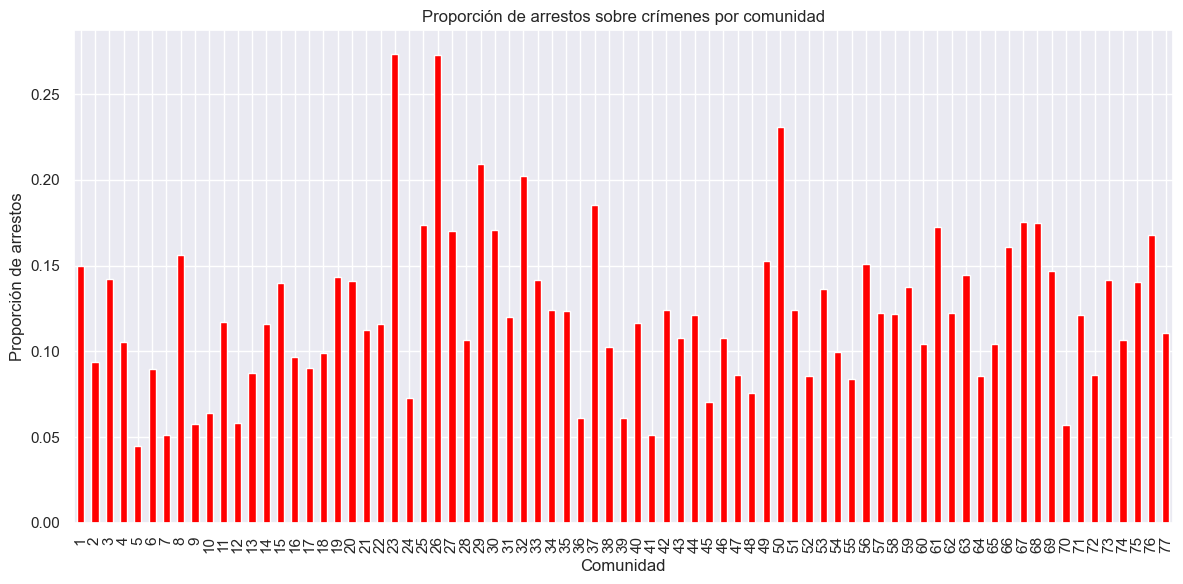

In [302]:
# Visualizar proporción de arrestos por comunidad
plt.figure(figsize=(12, 6))
proporcion_arrestos_comunidad.plot(kind='bar', color='red')
plt.title('Proporción de arrestos sobre crímenes por comunidad')
plt.xlabel('Comunidad')
plt.ylabel('Proporción de arrestos')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusión
Algunas zonas con alta criminalidad tienen baja proporción de arrestos, lo que sugiere una posible distribución ineficiente de las fuerzas policiales.

# ¿Cómo variaron los crímenes en la ciudad después de un evento social importante?

En este análisis se busca observar si los crímenes variaron antes y después de eventos importantes como la pandemia del COVID-19 o protestas sociales.

In [303]:
# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['date'], errors='coerce')
df['Month'] = df['date'].dt.month

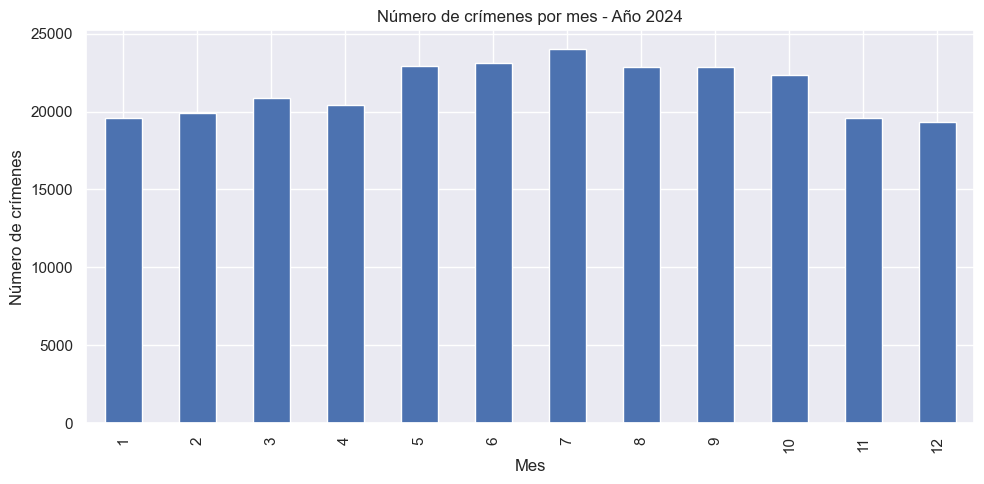

In [304]:
# Visualizar la cantidad de crímenes por mes (2024)
crimenes_por_mes = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
crimenes_por_mes.plot(kind='bar')
plt.title('Número de crímenes por mes - Año 2024')
plt.xlabel('Mes')
plt.ylabel('Número de crímenes')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusión
Este gráfico muestra los crímenes por mes durante 2024, pero **no se puede observar una tendencia relacionada con eventos sociales pasados** como la pandemia, ya que no hay datos previos a 2024 en el archivo.